# A - SETUP

### Import libs

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

### Common class and methods for coloring and display

In [2]:
# Setup default environment for display data and charts
def setup_env(seaborn_style = 'ticks', context='paper', max_columns = 200, max_rows=200):
    sns.set_style(seaborn_style)
    sns.set_context(context)
    #sns.set_palette(Cplan.get_palete("blues"))
    pd.set_option("display.max_columns", max_columns, "display.max_rows", max_rows,"display.max_colwidth", 200)
    return

In [3]:
# Color class
class Cplan:
    palettes={
                "default_palette":["#a9a9a9","#1B5886" ,"#F37413","#4c8e06"], #Grey, Blue, Orange
                "oranges" : ['#F7D53D', '#ECBD22', '#F7A400', '#F38701', '#F37413'],
                "oranges_r" : ['#F37413','#F38701','#F7A400',"#ECBD22","#F7D53D"],
                "greys" : ['#ffffff','#eeeeee','#dddddd','#cccccc','#bebebe','#a9a9a9','#949494','#636363'],
                "greys_r" : ['#636363','#949494','#a9a9a9','#bebebe','#cccccc','#dddddd',"#eeeeee","#ffffff"],
                "blues" : ['#deecfb', '#9FE7F5', '#6EB1D6', '#5293BB', '#3776A1', '#1B5886', '#003A6B'],
                "blues_r" : ['#003A6B','#1B5886','#3776A1','#5293BB','#6EB1D6','#9FE7F5','#deecfb'],
                "greens" : ['#d1face', '#73d802', '#4c8e06', '#163805'],
                "greens_r" : ['#163805','#4c8e06','#73d802','#d1face'],
            }
    highlight_color="#1B5886"
    base_color = "#a9a9a9"
    
    @staticmethod
    def print_palettes(palette = "default_palette"):
        colors={} 

        if (palette == "a") | (palette == "A"):
            colors = Cplan.palettes
        else:
            if palette in Cplan.palettes.keys():
                colors[palette] = Cplan.palettes[palette]

        if len(colors)>0:       
            for item in colors:
                display(Markdown(f'<span style="font-family: monospace">{item}</span>'))
                display(Markdown('<br>'.join(
                    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
                    for color in colors[item]
                )))
        else:
            display(Markdown('<br>'.join(
            f'<span style="font-family: monospace">{color_name}</span>'
            for color_name in Cplan.palettes.keys()
            )))
    @classmethod
    def get_palette(cls,palette= "default_palette"):
        return cls.palettes[palette]
       
    @classmethod
    def reset_color(cls):
        cls.highlight_color="#F37413"
        cls.base_color = "#a9a9a9"

In [4]:
# Set hightlight color on chart
def set_highlight(val,data = None, gtype='color', g=None):
    if gtype=='color':
        palete=[Cplan.highlight_color if x==val else Cplan.base_color for x in data]
        return palete
    if gtype=='xtick':
        for tick_label in g.axes.get_xticklabels():
            if tick_label.get_text()==val:
                tick_label.set_color(Cplan.highlight_color)
                tick_label.set_fontsize("10")
                tick_label.set_fontweight("800")
        return
    if gtype=='ytick':
        for tick_label in g.axes.get_yticklabels():
            if tick_label.get_text()==val:
                tick_label.set_color(Cplan.highlight_color)
                tick_label.set_fontsize("10")
                tick_label.set_fontweight("800")
        return

In [5]:
# Plot custom text on chart
def set_text(g,x,y,text):
    g.text(x, y, text, 
       fontsize = 10,          # Size
       #fontstyle = "oblique",  # Style
       color = Cplan.highlight_color,          # Color
       ha = "center", # Horizontal alignment
       va = "bottom",
        rotation = 0,
    )
    return

In [6]:
# Remove borders of chart
def remove_border(g,left=False, right = True, top=True, bottom  = False):
    g.spines['top'].set_visible(top)
    g.spines['right'].set_visible(right)
    g.spines['left'].set_visible(left)
    g.spines['bottom'].set_visible(bottom)
    
    return

### Common methods for data preparation

In [7]:
def view_description(des,var_col = 'Variables', var_name = ''):
    return des[des[var_col] == var_name]

In [8]:
#Examining dataset missing values
def examine_data(data, visualize_missing = False, thres=0, figsize=(8,4), annotation=False, savefig=False, filename=''):
    null_data = data.isnull().sum()
    types = data.dtypes
    dtypes=[types[x] for x in null_data.index]
    examine_df =pd.DataFrame({"COLUMN_NAME": null_data.index,
                "NULL_COUNT": null_data.values,
                "DTYPE": dtypes})
    examine_df["NULL_PERCENT"]=examine_df["NULL_COUNT"]/len(data)*100
    examine_df["VARIABLE_TYPE"]=examine_df.DTYPE.apply(lambda x: "categorical" if x==object else "numerical")
    examine_df["HANDLING_METHOD"]="NA"
    
    # plotting missing data
    if visualize_missing== True:
        #colors=[Cplan.highlight_color]
        plot = examine_df[examine_df['NULL_PERCENT']>thres].plot(kind='bar',x='COLUMN_NAME',y='NULL_PERCENT',
                                                            legend=None,
                                                            #title='% of null values',fontsize = 12,
                                                            figsize=figsize)#, color=colors)
        #plt.legend(['% of Null values'],loc = 'best', bbox_to_anchor=(1., 1.), fontsize = 8)
        plt.title('Percentage of null values in each column',fontdict={'size':12, 'weight':800, 'color':Cplan.highlight_color})
        plt.xlabel(xlabel='COLUMN_NAME',fontdict={'size':10, 'weight':800, 'color':Cplan.highlight_color})
        plt.ylabel(ylabel='NULL_PERCENT (%)',fontdict={'size':10, 'weight':800, 'color':Cplan.highlight_color})
        if annotation==True:
            for bar in plot.patches:
                plot.annotate(format(bar.get_height(), '.2f'),
                               (bar.get_x() + bar.get_width() / 2,
                                bar.get_height()), ha='center', va='center',
                               size=8, xytext=(0, 5),
                               textcoords='offset points')
        if savefig==True:
            #filename = 'Images\\missing_values_thres'+ str(thres) + '.png'
            plt.savefig(filename, dpi=100, bbox_inches="tight")
        plt.show()
    return examine_df

In [9]:
# Missing values imputation
def impute(data, col, func, val=np.nan):
    clean_data = data
    
    if func=='replace':
        clean_data[col].fillna(val, inplace=True)
        
    elif func=='mean':
        fill_val = data[col].mean()
        clean_data[col].fillna(fill_val, inplace=True)
        
    elif func=='median':
        fill_val = data[col].median()
        clean_data[col].fillna(fill_val, inplace=True)
        
    elif func=='mode':
        fill_val = data[col].mode()[0]
        clean_data[col].fillna(fill_val, inplace=True)
        
    elif func == 'drop':
        clean_data.drop(col, axis=1, inplace=True)
    elif func == 'remove':
        #clean_data.dropna( axis=0, inplace=True)
        clean_data = data[~(data[col].isnull())]
    else:
        return 'Invalid func. Valid: mean, median, mode,drop ,value'
    
    return clean_data

### Common methods for data analysis and visualization

In [10]:
# Plot custom chart to univariate analyze
def uni_plot(data, col, var_type = "numerical", n_sub = (1,2), 
                 bins=50, rotation=0, figsize=(8,4), face_highlight=False, text_highlight=False,
                savefig=False, filename='univariate_n.png'):
    fig, axes = plt.subplots(nrows=n_sub[0], ncols=n_sub[1], figsize=figsize)
    titles=[col,col]
    xlabels=[" ", " "]
    ylabels=[" ", " "]
    
    if (var_type== "numerical") | (var_type== "n"):
        #titles=[col + "-Histogram",col+ "-Boxplot"]
        h = sns.histplot(data, x=col,color=Cplan.highlight_color,bins=bins,ax=axes[0])
        b = sns.boxplot(data, x=col,color=Cplan.highlight_color,width=0.6, 
                        linewidth = 1.2,medianprops={"color": "#F37413"},ax=axes[1])
        
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
    
    if (var_type== "category") | (var_type== "c"):
        #titles=[col + "-Bar",col+ "-Pie"]
        ylabels=["Percentage", " "]
        s = data[col].value_counts(normalize = True)*100
        explode=[0.1 if x==s.max() else 0 for x in s]
        if face_highlight==True:
            colors=sns.color_palette(set_highlight(val=s.max(),data=s))
        else:
            colors=sns.color_palette()
        b = sns.barplot(x=s.index,y=s.values, ax=axes[0], palette=colors)
        p,texts,autotexts = axes[1].pie(s,autopct='%.1f%%',explode=explode, 
                                        textprops={'fontsize': 8}, pctdistance=1.1)#, colors=colors)
        
        p_legend = axes[1].legend(s.index, loc = 'best', bbox_to_anchor=(1., 0.9), fontsize = 8)
        if text_highlight==True:
            set_highlight(val=s.index[0],gtype='xtick',g=b)
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
            axes[i].tick_params(axis='x',rotation=rotation)
    
    if savefig == True:
        plt.savefig(filename, dpi=100, bbox_inches="tight")
    
    fig.tight_layout()
    plt.show()
    return

In [11]:
# Plot charts to bivariate analyze
def bi_plot(data, col,target='TARGET',var_type = "numerical", aggfunc='count',
                n_sub = (1,2), transform=True,
                bins=50, rotation=0, figsize=(8,4), face_highlight=False, text_highlight=False,
               savefig=False, filename=''):
    
    titles=[col,col]
    xlabels=[" ", " "]
    ylabels=[" ", " "]
    
    if (var_type== "numerical") | (var_type== "n"):
        titles=[' ',' ']
        xlabels=['', target]
        ylabels=[col, " "]
        fig, axes = plt.subplots(nrows=n_sub[0], ncols=n_sub[1], figsize=figsize)
        h = sns.histplot(data, y=col,hue=target ,hue_order =[0,1],
                         palette=[Cplan.base_color,Cplan.highlight_color],bins=bins,ax=axes[0])
        #b = sns.boxplot(data, x=target,y=col,palette=[Cplan.base_color,Cplan.highlight_color],width=0.6, 
        #                linewidth = 1.2,medianprops={"color": "#F37413"},ax=axes[1])
        sns.violinplot(data,y=col,x=target,palette=[Cplan.base_color,Cplan.highlight_color])
        
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
    
    if (var_type == "category") | (var_type == "c"):
        titles=['Distribution of values','% in target segments']
        fig, axes = plt.subplots(nrows=n_sub[0], ncols=n_sub[1], figsize=figsize, sharey=True)
        xlabels=["Count", "Percent(%)"]
        #Prepare data
        if transform==False:
            d=pd.crosstab(index=data[target], columns=data[col])
            d1=pd.crosstab(index=data[target], columns=data[col], normalize='index')*100
            ylabels=[target, " "]
            legend_title=col
        else:
            ylabels=[col, " "]
            legend_title=target
            d=pd.crosstab(index=data[col], columns=data[target])
            #sort_value = 1
            #d.sort_values(by=sort_value, ascending=True, inplace=True)
            d=d.reindex(data[col].value_counts(ascending = True).index)
            d1=pd.crosstab(index=data[col], columns=data[target], normalize='index')*100
            d1 = d1.reindex(d.index)
        if face_highlight==True:
            colors=sns.color_palette(set_highlight(val=1, data=d.columns))
        else:
            colors=sns.color_palette()
        
        d.plot(kind='barh', stacked=True, ax=axes[0], color=colors)
        axes[0].legend([],[],frameon=False)
        d1.plot(kind='barh', stacked=True,ax=axes[1], color=colors)
        p_legend = axes[1].legend(d.columns,title=legend_title ,loc = 'best', bbox_to_anchor=(1., 1.), fontsize = 8)
        #if text_highlight==True:
        #    set_highlight(val=s.index[0],gtype='xtick',g=b)
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
            axes[i].tick_params(axis='x',rotation=rotation)
    
    if savefig == True:
        if len(filename)==0:
            filename = 'Images\\bivariate_' + col + '.png'
        plt.savefig(filename, dpi=100, bbox_inches="tight")
    fig.tight_layout()
    plt.show()
    return

In [12]:
#Visuallize all univariate variables by type
def plot_all(data,cols=[] ,var_type='categorical', ncols=3,chart='histogram', figsize=(10,10),nbins=50,
            savefig = False, filename='plot_all_hist.png'):
    if len(cols)==0:
        a=data.dtypes
        if var_type in ['categorical','c'] :
            cols = a[(a==object)].index
        else:
            cols = a[(a==float)|(a==int)|(a=="int64")].index
    
    #nrows=(len(cols)-1)//ncols + 1
    nrows = int(np.ceil(len(cols)/ncols))
    #fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    plt.figure(figsize=figsize)
    for i,col in enumerate(cols):
        x=i//ncols
        y=i%ncols
        #ax = (axes[y] if nrows==1 else axes[x,y])
        ax = plt.subplot(nrows, ncols, i+1)
        if var_type in ['categorical','c']: #Category
            s=round(data[col].value_counts(normalize=True)*100,1)
            colors=sns.color_palette(set_highlight(val=s.max(),data=s))
            sns.barplot(y=s.index,x=s.values, ax= ax, palette=colors,orient='h',order=s.index)
            ax.tick_params(axis='y',rotation=0, labelsize=8)
            ax.set_xlabel("Percentage (%)",fontsize =10)
            ax.set_ylabel(" ")
        elif var_type in ['numerical','n']:
            if chart=='histogram':
                sns.histplot(data,x=col,bins=nbins ,ax=ax)
            elif chart=='boxplot':
                sns.boxplot(data, x=col,width=0.6,linewidth = 1.2,ax=ax,medianprops={"color": "#F37413"})
            ax.tick_params(axis='both',rotation=0, labelsize=8)
            ax.set_xlabel(" ")
            ax.set_ylabel(" ")
            
        ax.set_title(col,fontdict={'fontsize': 12, 'fontweight' : 500, 'color' : Cplan.highlight_color})
        
    if savefig == True:
        plt.savefig(filename, dpi=100, bbox_inches="tight")
            
    plt.tight_layout()
    plt.show()
    return

In [13]:
def find_correlation_list(data, top=10):
    corr = data.corr()
    corr.fillna(0, inplace=True)
    corr_dict ={'Var1':[],
                'Var2': [],
                'Correlation':[]
                }
    for i, x in enumerate(corr.index):
        for j,y in enumerate(corr.index):
            if j<=i:
                corr_dict['Correlation'].append(0)
            else:
                corr_dict['Correlation'].append(corr.iloc[i,j])
            corr_dict['Var1'].append(x)
            corr_dict['Var2'].append(y)

    corr_df=pd.DataFrame(corr_dict)
    corr_df['Correlation_abs'] = abs(corr_df.Correlation)
    corr_df['Correlation'] = round(corr_df.Correlation,2)
    corr_df.sort_values(by='Correlation_abs', ascending=False, inplace=True)
    
    return corr_df[['Var1','Var2','Correlation']].head(top)

### Setup environment

In [14]:
setup_env()

### Reading data from datafiles

In [15]:
leads = pd.read_csv('Leads.csv')

In [16]:
#check application_data
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [17]:
#Reading column description
column_des = pd.read_excel("Leads Data Dictionary.xlsx",header=2)
column_des.drop("Unnamed: 0", axis=1, inplace=True)
column_des

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [18]:
view_description(column_des, var_name='Lead Number')

,Variables,Description
1,Lead Number,A lead number assigned to each lead procured.


# B - LEAD SCORING CASE STUDY

**Will do following steps:**

    1- Data Understanding the Preparation
    2- Exploratory Data Analysis (EDA) 
    3- Data Preparation for Model building
        + Treating Categorical Variables
        + Splitting the Data into Training and Test Sets
        + Scaling 
        + Deviding into X and Y sets for model building
    4- Building Model & Making Predictions
    5- Model Evaluation & Interpretation

## 1 - Data Understanding the Preparation

### Data Understanding

In [19]:
#Check size of data
leads.shape

(9240, 37)

In [20]:
#View some data
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [21]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [22]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [23]:
#Description of variables
column_des

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


### Data Preparation

- Missing values handling
- Standardising data

#### Missing values handling

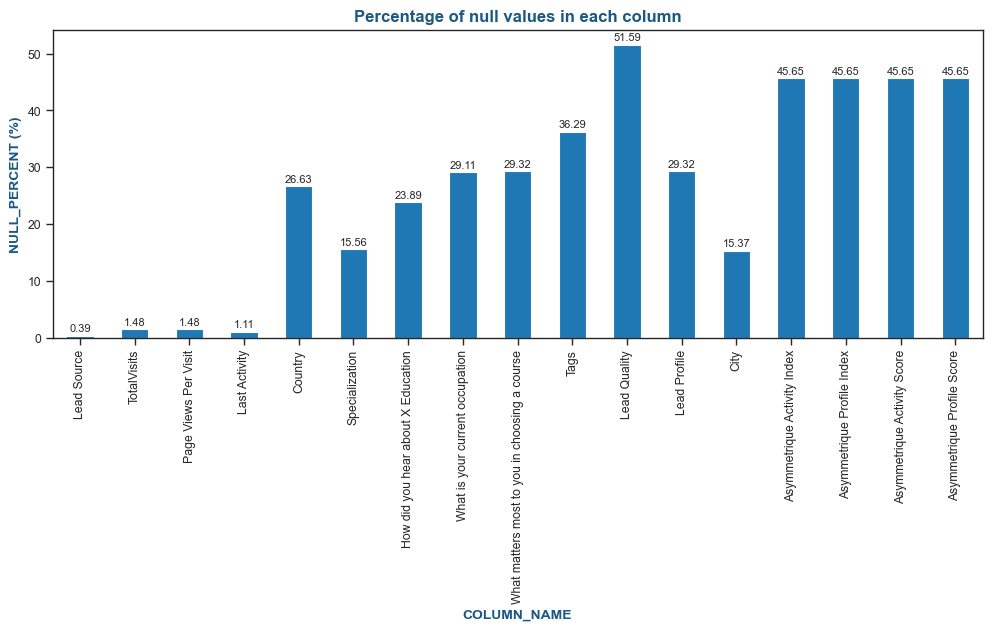

In [24]:
#Inspecting data
lead_data_structure = examine_data(leads, visualize_missing=True, figsize=(12,4), annotation=True)

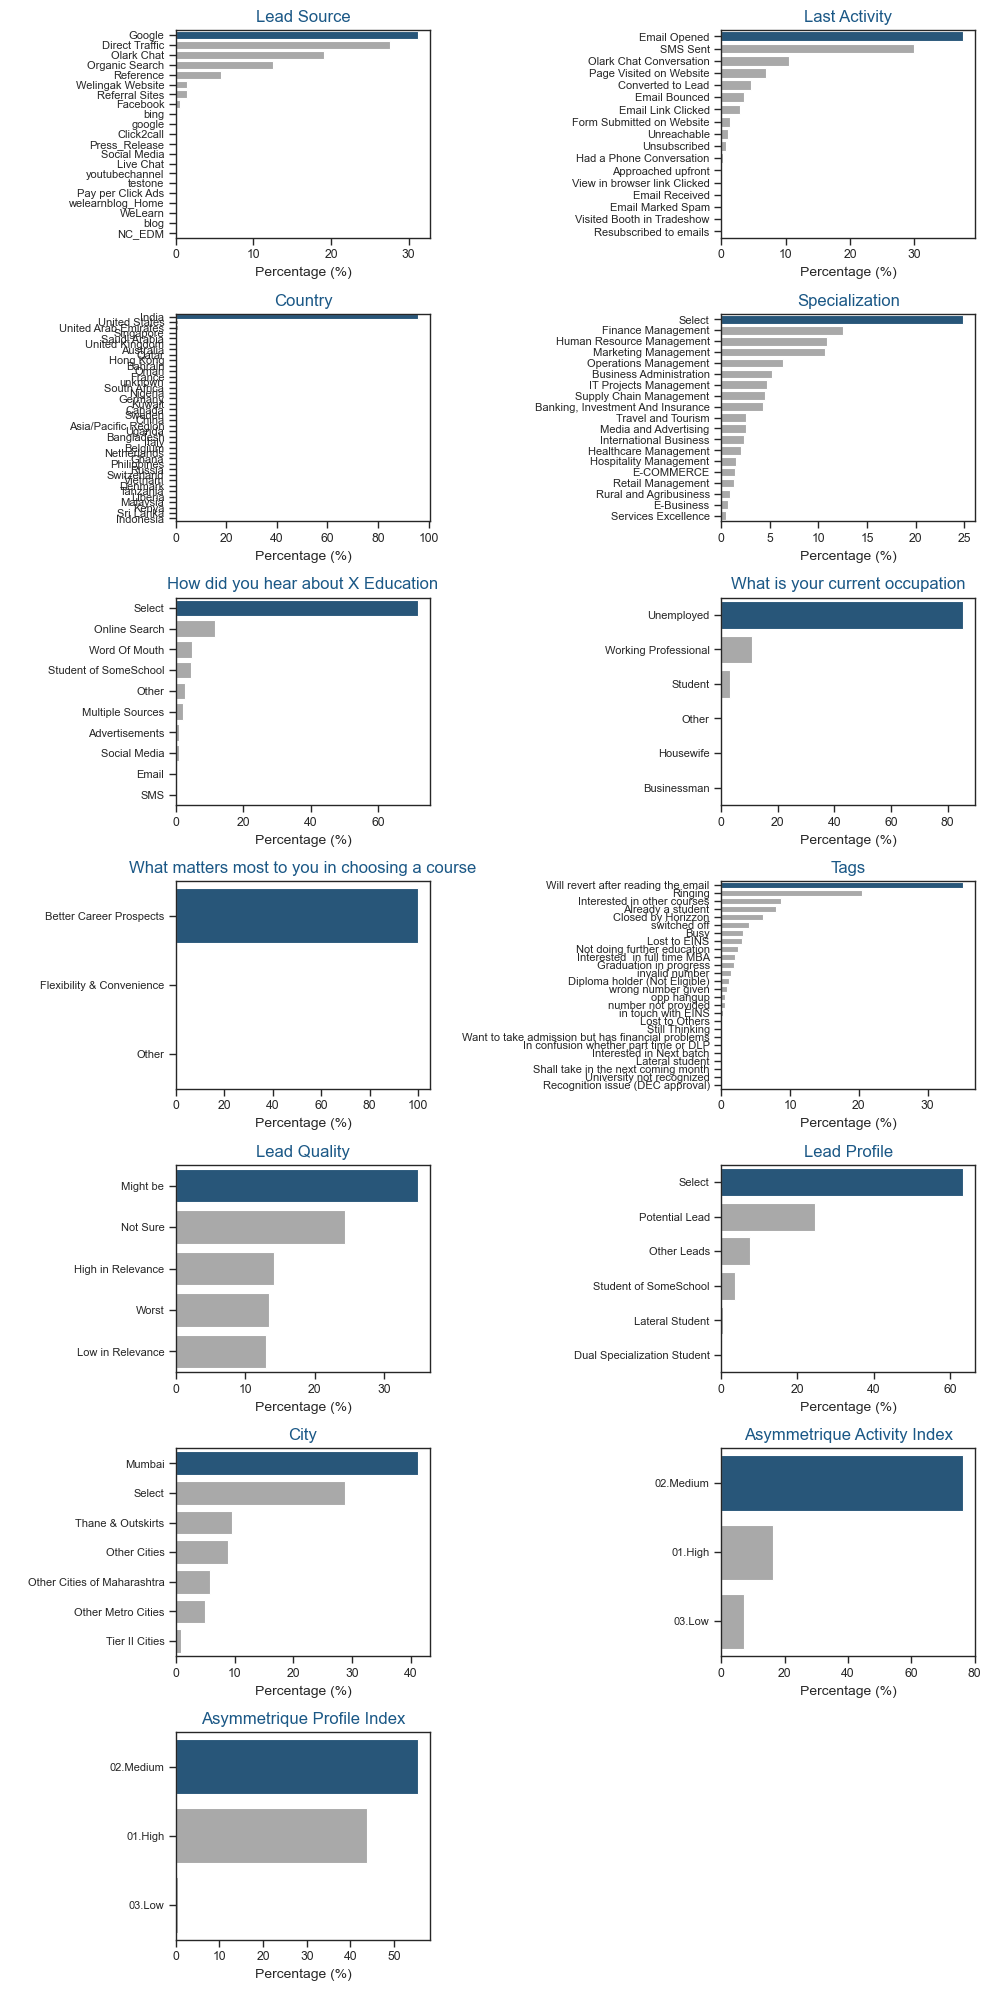

In [25]:
#view value distribution of categorical column
c_cols = lead_data_structure.COLUMN_NAME[(lead_data_structure.NULL_PERCENT>0) & 
                                        (lead_data_structure.VARIABLE_TYPE=='categorical')]
plot_all(leads, cols=c_cols, var_type='c', ncols=2, figsize=(10,20))


* Some variables have **Select** value, that's equivalent to null value

In [26]:
leads.replace('Select', np.nan, inplace=True)

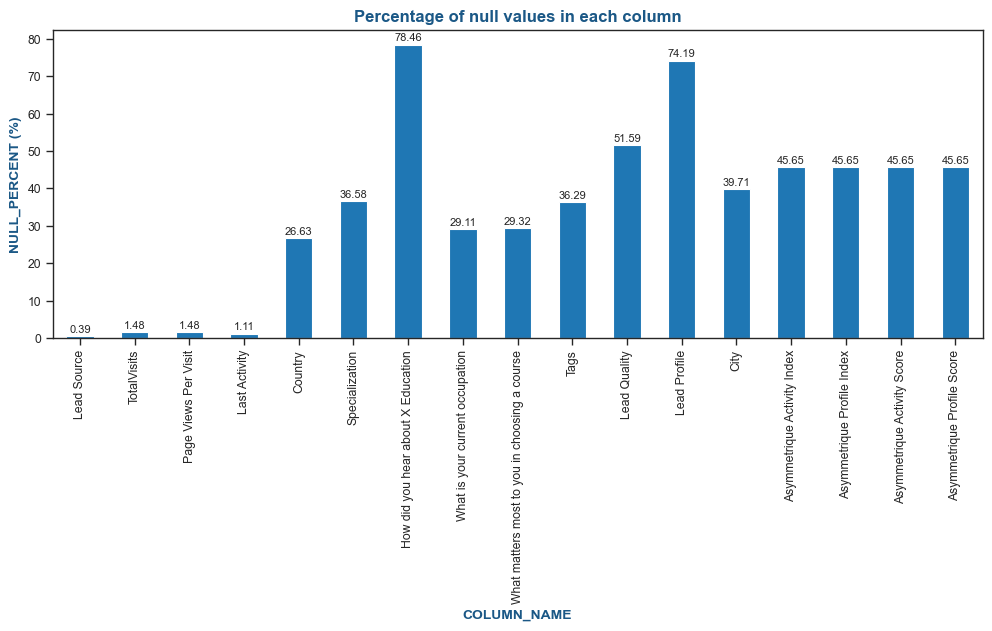

In [27]:
#Inspecting data
lead_data_structure = examine_data(leads, visualize_missing=True, figsize=(12,4), annotation=True)

In [28]:
#Columns having >40% null values
lead_data_structure[lead_data_structure.NULL_PERCENT>40]

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
13,How did you hear about X Education,7250,object,78.463203,categorical,NA
25,Lead Quality,4767,object,51.590909,categorical,NA
28,Lead Profile,6855,object,74.188312,categorical,NA
30,Asymmetrique Activity Index,4218,object,45.649351,categorical,NA
31,Asymmetrique Profile Index,4218,object,45.649351,categorical,NA
32,Asymmetrique Activity Score,4218,float64,45.649351,numerical,NA
33,Asymmetrique Profile Score,4218,float64,45.649351,numerical,NA


* Drop columns which have more than 40% null values

In [29]:
#Drop comlumns having >40% null values
clean_leads = impute(leads, func='drop', col=lead_data_structure[lead_data_structure.NULL_PERCENT>40]["COLUMN_NAME"])

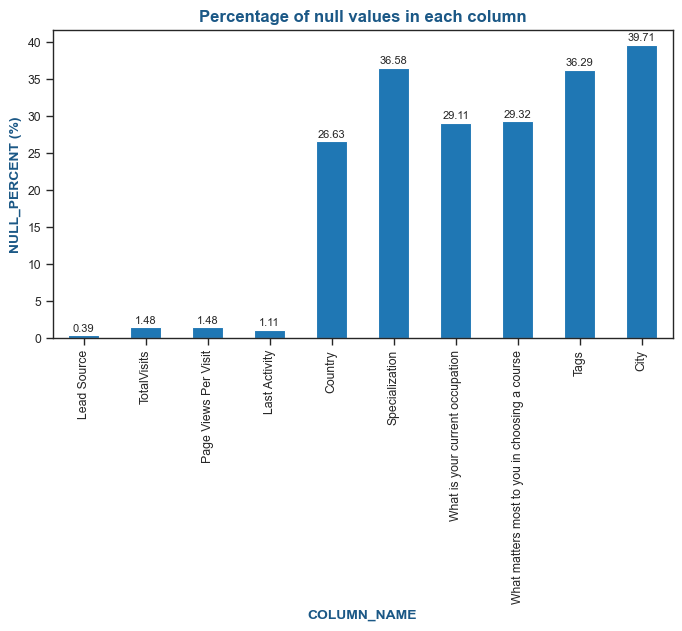

In [30]:
#View other columns which have missing values
lead_data_structure = examine_data(clean_leads, visualize_missing=True, thres=0, annotation=True, figsize=(8,4))

##### Checking categorical variables

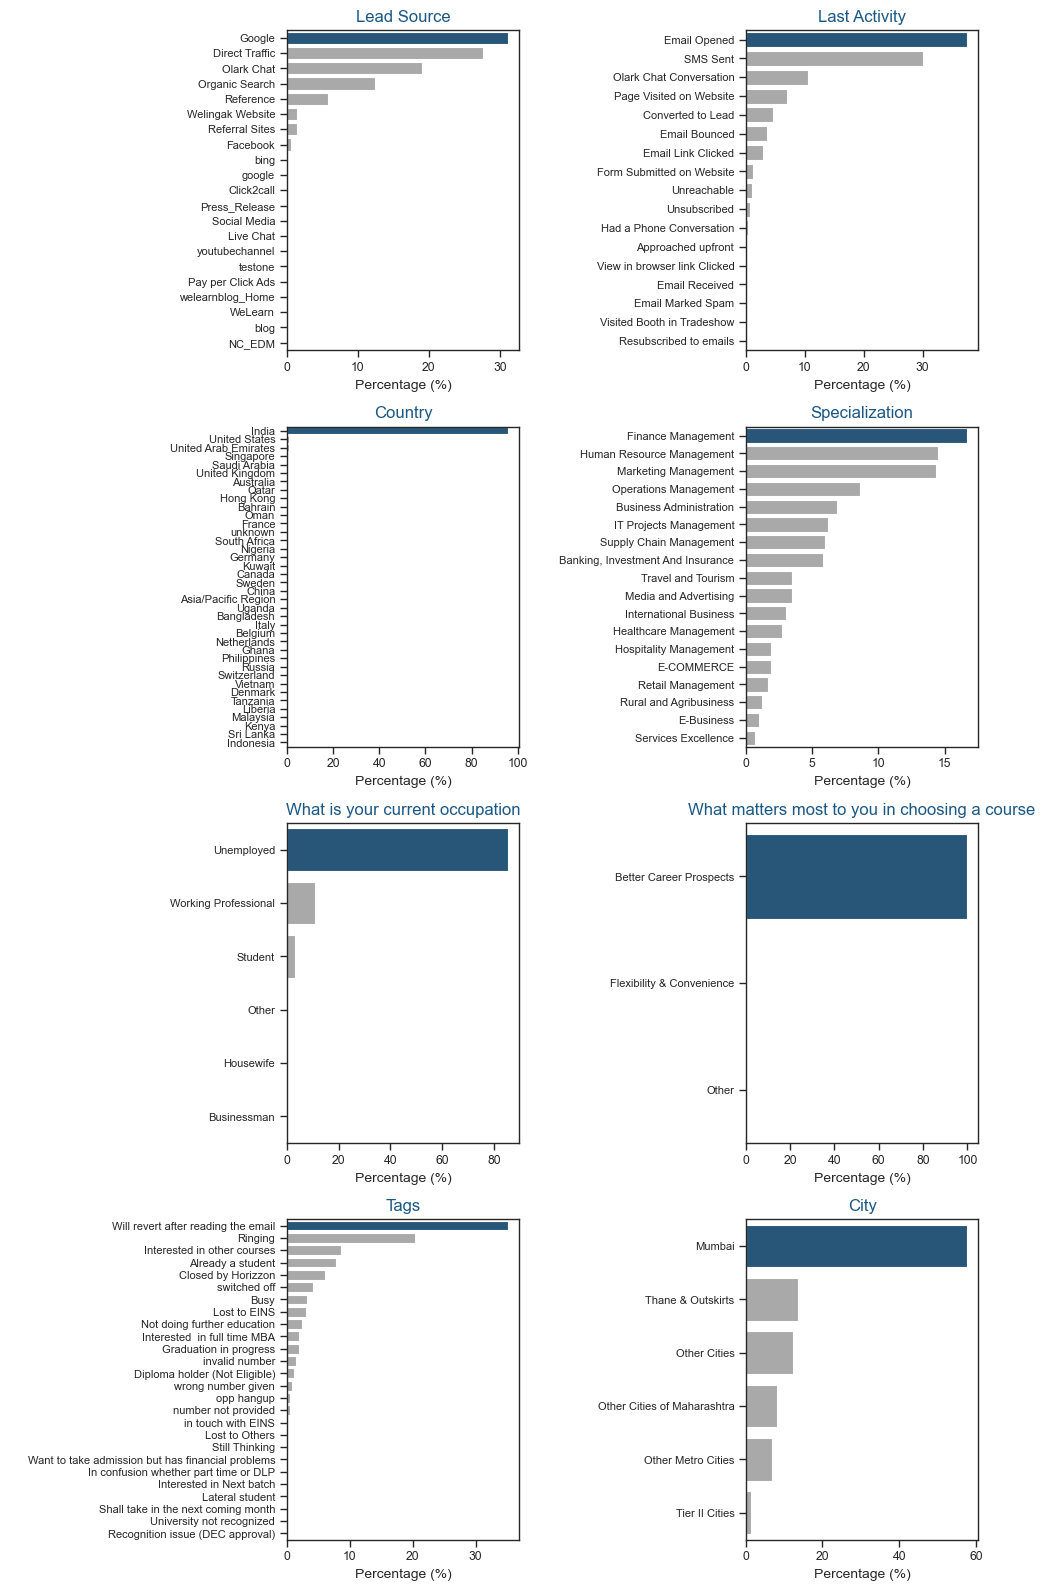

In [31]:
#view value distribution of categorical columns
c_cols = lead_data_structure.COLUMN_NAME[(lead_data_structure.NULL_PERCENT>0) & 
                                        (lead_data_structure.VARIABLE_TYPE=='categorical')]
plot_all(leads, cols=c_cols, var_type='c', ncols=2, figsize=(10,16))

In [32]:
lead_data_structure[(lead_data_structure.NULL_PERCENT>0) & (lead_data_structure.VARIABLE_TYPE == 'categorical')]

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
3,Lead Source,36,object,0.389610,categorical,NA
10,Last Activity,103,object,1.114719,categorical,NA
11,Country,2461,object,26.634199,categorical,NA
12,Specialization,3380,object,36.580087,categorical,NA
13,What is your current occupation,2690,object,29.112554,categorical,NA
14,What matters most to you in choosing a course,2709,object,29.318182,categorical,NA
23,Tags,3353,object,36.287879,categorical,NA
26,City,3669,object,39.707792,categorical,NA


#### Handling methods for categorical variables:
- Lead Source: removing null values
- Last Activity: removing null values
- Country: Imputing with **mode** value
- Specialization: Replace by **"Others"** category
- What is your current occupation: Imputing with **mode** value
- What matters most to you in choosing a course: Imputing with **mode** value
- Tags: Replace by **"Others"** category
- City: Imputing with **mode** value

In [33]:
# Note handling method of columns
lead_data_structure.HANDLING_METHOD[lead_data_structure.COLUMN_NAME.isin(['Lead Source', 'Last Activity'])]="remove"
lead_data_structure.HANDLING_METHOD[lead_data_structure.COLUMN_NAME.isin(['Country', 'What is your current occupation', 
                                                                         'City',
                                                                         'What matters most to you in choosing a course'])]="mode"
lead_data_structure.HANDLING_METHOD[lead_data_structure.COLUMN_NAME.isin(['Specialization', 'Tags', 
                                                                         ])]="replace"



In [34]:
lead_data_structure[lead_data_structure.NULL_COUNT>0]

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
3,Lead Source,36,object,0.389610,categorical,remove
7,TotalVisits,137,float64,1.482684,numerical,NA
9,Page Views Per Visit,137,float64,1.482684,numerical,NA
10,Last Activity,103,object,1.114719,categorical,remove
11,Country,2461,object,26.634199,categorical,mode
12,Specialization,3380,object,36.580087,categorical,replace
13,What is your current occupation,2690,object,29.112554,categorical,mode
14,What matters most to you in choosing a course,2709,object,29.318182,categorical,mode
23,Tags,3353,object,36.287879,categorical,replace
26,City,3669,object,39.707792,categorical,mode


##### Checking nummerical variables

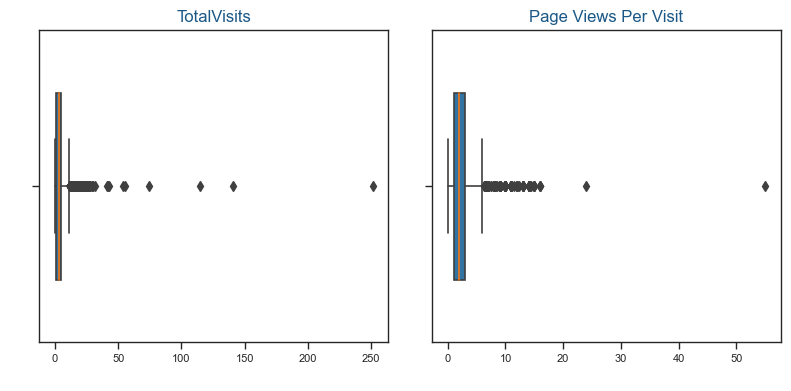

In [35]:
#Numerical coumns
n_cols = lead_data_structure.COLUMN_NAME[(lead_data_structure.NULL_PERCENT>0) & 
                                        (lead_data_structure.VARIABLE_TYPE=='numerical')]
plot_all(leads, cols=n_cols,ncols=2, var_type='n', chart='boxplot', figsize=(8,4))

In [36]:
lead_data_structure[lead_data_structure.COLUMN_NAME.isin(n_cols)]

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
7,TotalVisits,137,float64,1.482684,numerical,NA
9,Page Views Per Visit,137,float64,1.482684,numerical,NA


* TotalVisits, Page Views Per Visit: imputed with **median** value

In [37]:
# Note handling method of columns
lead_data_structure.HANDLING_METHOD[lead_data_structure.COLUMN_NAME.isin(n_cols)]='median'

In [38]:
lead_data_structure[lead_data_structure.NULL_COUNT>0]

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
3,Lead Source,36,object,0.389610,categorical,remove
7,TotalVisits,137,float64,1.482684,numerical,median
9,Page Views Per Visit,137,float64,1.482684,numerical,median
10,Last Activity,103,object,1.114719,categorical,remove
11,Country,2461,object,26.634199,categorical,mode
12,Specialization,3380,object,36.580087,categorical,replace
13,What is your current occupation,2690,object,29.112554,categorical,mode
14,What matters most to you in choosing a course,2709,object,29.318182,categorical,mode
23,Tags,3353,object,36.287879,categorical,replace
26,City,3669,object,39.707792,categorical,mode


In [39]:
#Imputing missing values
cols = lead_data_structure.COLUMN_NAME[lead_data_structure.NULL_PERCENT>0]
handling_method = lead_data_structure.HANDLING_METHOD[lead_data_structure.NULL_PERCENT>0]
for x,y in zip(cols, handling_method):
    clean_leads = impute(clean_leads, col=x, func=y, val = 'Others')


In [40]:
#check missing values in app_data again
clean_leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

In [41]:
# check duplicate
clean_leads.duplicated().sum()

0

In [42]:
# Check_size
clean_leads.shape

(9103, 30)

#### Standardizing Data

In [43]:
# Checking Categorical Variables
c_cols = lead_data_structure[(lead_data_structure.VARIABLE_TYPE == 'categorical') 
                             & (lead_data_structure.COLUMN_NAME != 'Prospect ID')]['COLUMN_NAME']
bi_cols = [] # 2-classes category
multi_cols = [] # multi-classes category
for x in c_cols:
    if len(clean_leads[x].value_counts()) <3:
        bi_cols.append(x)
    else:
        multi_cols.append(x)



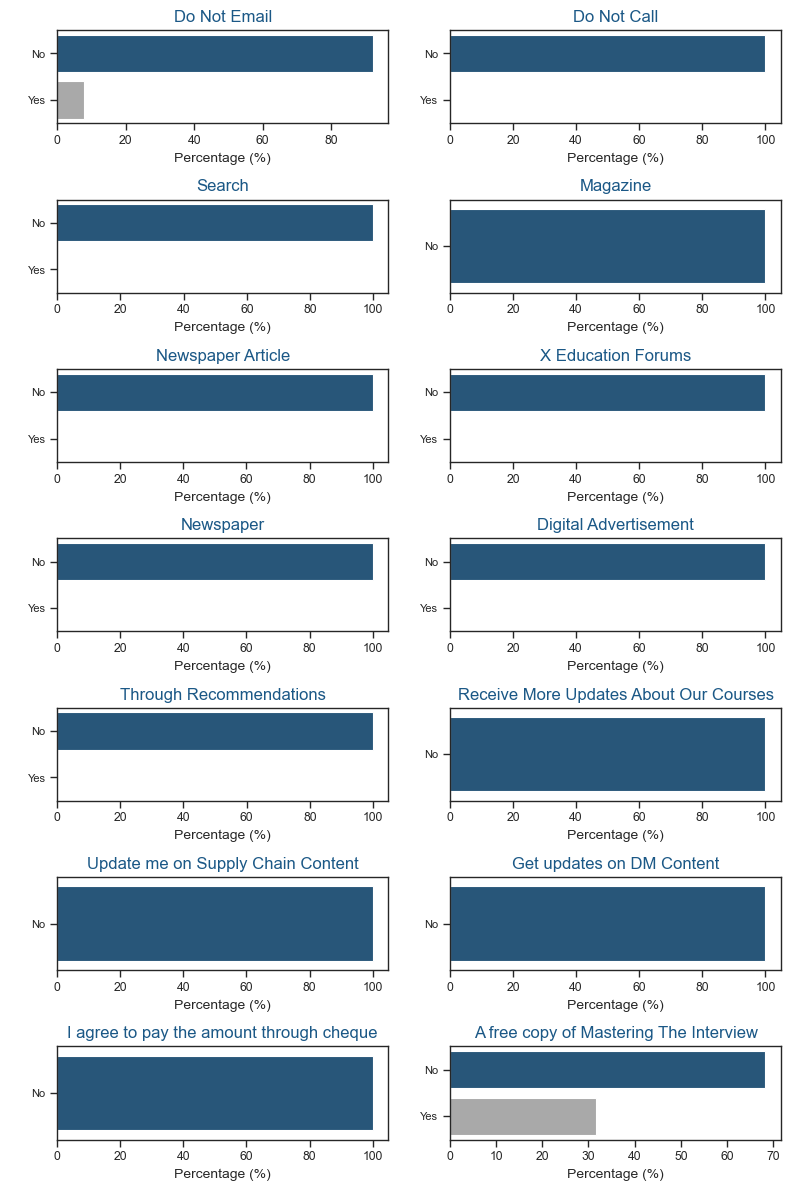

In [44]:
# Checking binary variable
plot_all(clean_leads, cols=bi_cols,ncols=2 ,var_type='c', figsize=(8,12))

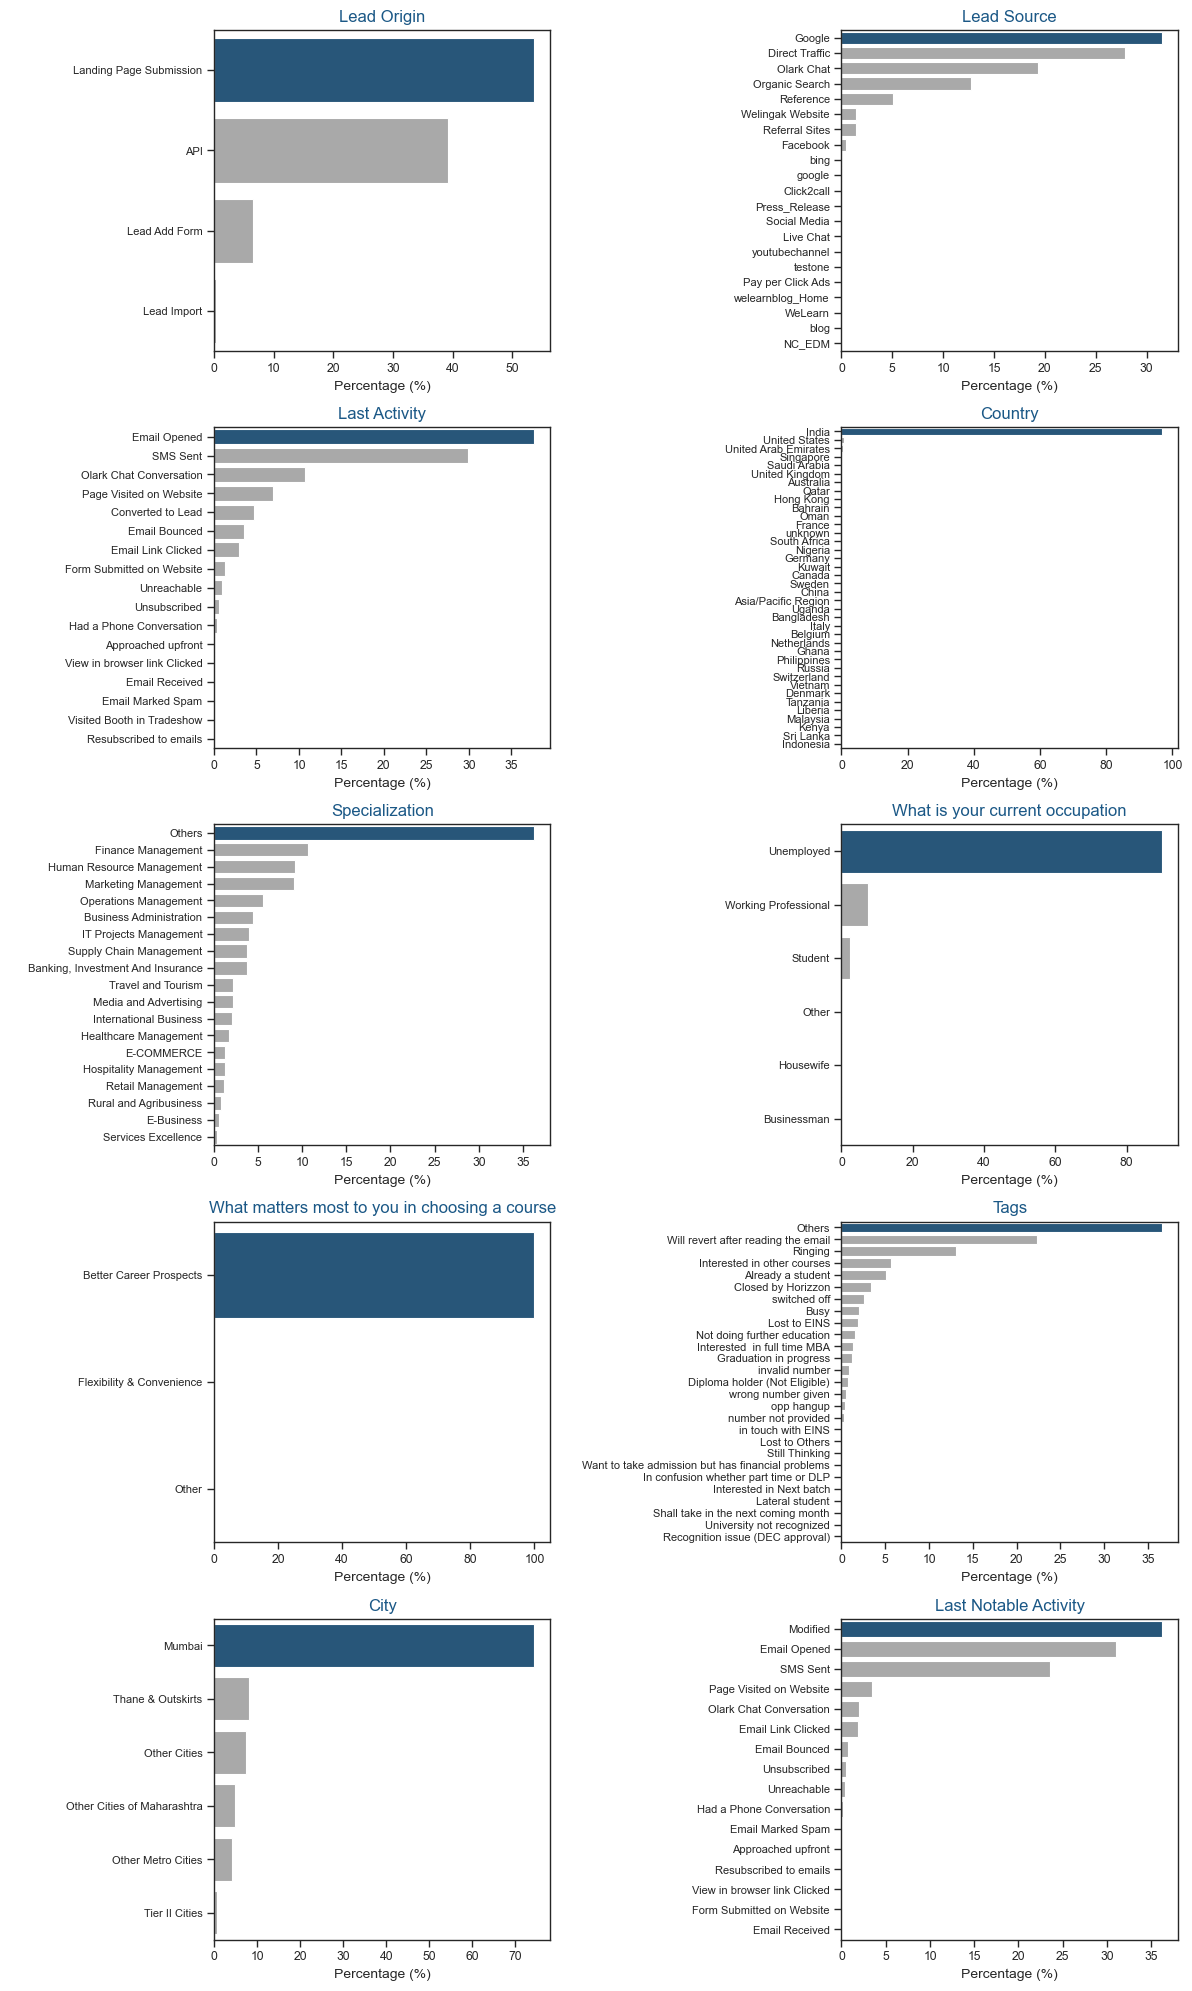

In [45]:
# Multi-classes category
plot_all(clean_leads, cols=multi_cols,ncols=2 ,var_type='c', figsize=(10,20))

* **Lead Source**: We need to replace "google" by "Google"

In [46]:
clean_leads.replace("google", "Google", inplace=True)

##### Lead Source

In [47]:
l = round(clean_leads['Lead Source'].value_counts(normalize=True)*100,2)
l

Google               31.56
Direct Traffic       27.94
Olark Chat           19.28
Organic Search       12.68
Reference             5.08
Welingak Website      1.42
Referral Sites        1.37
Facebook              0.43
bing                  0.07
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [48]:
l[l<0.1].index

Index(['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release',
       'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home',
       'youtubechannel', 'testone', 'NC_EDM'],
      dtype='object')

In [49]:
# Replace small proportion classes with 'Others'
clean_leads['Lead Source'].replace(['bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release',
       'Pay per Click Ads', 'blog', 'WeLearn', 'welearnblog_Home',
       'youtubechannel', 'testone', 'NC_EDM'],'Others', inplace=True)

In [50]:
round(clean_leads['Lead Source'].value_counts(normalize=True)*100,2)

Google              31.56
Direct Traffic      27.94
Olark Chat          19.28
Organic Search      12.68
Reference            5.08
Welingak Website     1.42
Referral Sites       1.37
Facebook             0.43
Others               0.25
Name: Lead Source, dtype: float64

##### Last Activity

In [51]:
l = round(clean_leads['Last Activity'].value_counts(normalize=True)*100,2)
l

Email Opened                    37.70
SMS Sent                        29.91
Olark Chat Conversation         10.69
Page Visited on Website          7.03
Converted to Lead                4.70
Email Bounced                    3.53
Email Link Clicked               2.93
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.65
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [52]:
l[l<0.5].index

Index(['Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],
      dtype='object')

In [53]:
clean_leads['Last Activity'].replace(['Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],'Others', inplace=True)

In [54]:
round(clean_leads['Last Activity'].value_counts(normalize=True)*100,2)

Email Opened                 37.70
SMS Sent                     29.91
Olark Chat Conversation      10.69
Page Visited on Website       7.03
Converted to Lead             4.70
Email Bounced                 3.53
Email Link Clicked            2.93
Form Submitted on Website     1.27
Unreachable                   1.02
Unsubscribed                  0.65
Others                        0.56
Name: Last Activity, dtype: float64

##### Last Notable Activity

In [55]:
l = round(clean_leads['Last Notable Activity'].value_counts(normalize=True)*100,2)
l

Modified                        36.21
Email Opened                    31.01
SMS Sent                        23.64
Page Visited on Website          3.49
Olark Chat Conversation          2.01
Email Link Clicked               1.90
Email Bounced                    0.66
Unsubscribed                     0.49
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [56]:
l[l<0.3].index

Index(['Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received'],
      dtype='object')

In [57]:
clean_leads['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received'],'Others', inplace=True)

In [58]:
round(clean_leads['Last Notable Activity'].value_counts(normalize=True)*100,2)

Modified                   36.21
Email Opened               31.01
SMS Sent                   23.64
Page Visited on Website     3.49
Olark Chat Conversation     2.01
Email Link Clicked          1.90
Email Bounced               0.66
Unsubscribed                0.49
Unreachable                 0.35
Others                      0.23
Name: Last Notable Activity, dtype: float64

##### Country

In [59]:
l = round(clean_leads['Country'].value_counts(normalize=True)*100,2)
l

India                   96.85
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.07
France                   0.07
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

In [60]:
l[l<0.1].index

Index(['Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'South Africa',
       'Nigeria', 'Germany', 'Kuwait', 'Canada', 'Sweden', 'China',
       'Asia/Pacific Region', 'Uganda', 'Bangladesh', 'Italy', 'Belgium',
       'Netherlands', 'Ghana', 'Philippines', 'Russia', 'Switzerland',
       'Vietnam', 'Denmark', 'Tanzania', 'Liberia', 'Malaysia', 'Kenya',
       'Sri Lanka', 'Indonesia'],
      dtype='object')

In [61]:
clean_leads['Country'].replace(['Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'South Africa',
       'Nigeria', 'Germany', 'Kuwait', 'Canada', 'Sweden', 'China',
       'Asia/Pacific Region', 'Uganda', 'Bangladesh', 'Italy', 'Belgium',
       'Netherlands', 'Ghana', 'Philippines', 'Russia', 'Switzerland',
       'Vietnam', 'Denmark', 'Tanzania', 'Liberia', 'Malaysia', 'Kenya',
       'Sri Lanka', 'Indonesia'],'Others', inplace=True)

In [62]:
round(clean_leads['Country'].value_counts(normalize=True)*100,2)

India                   96.85
Others                   0.90
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Name: Country, dtype: float64

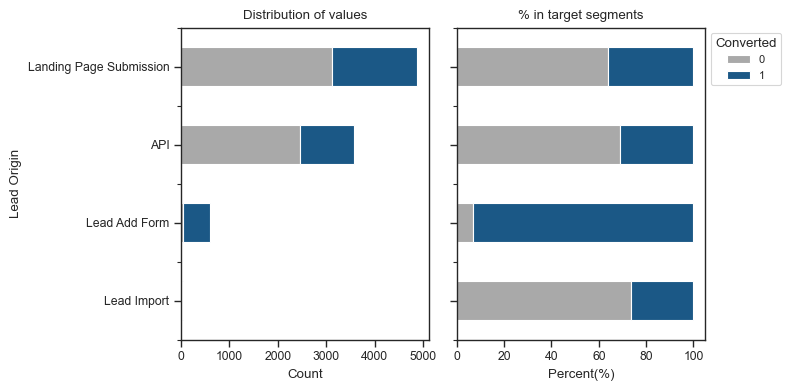

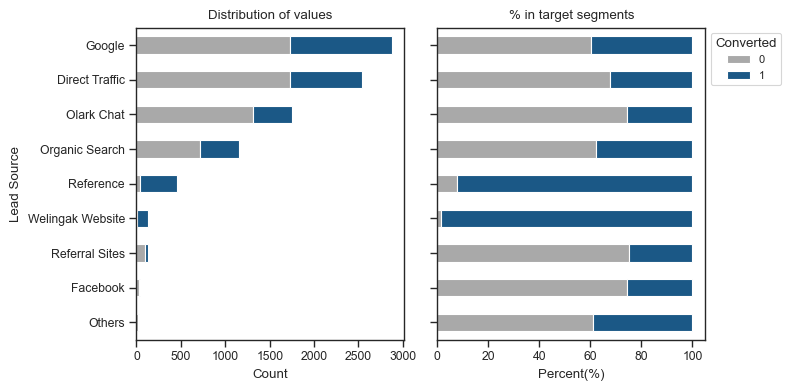

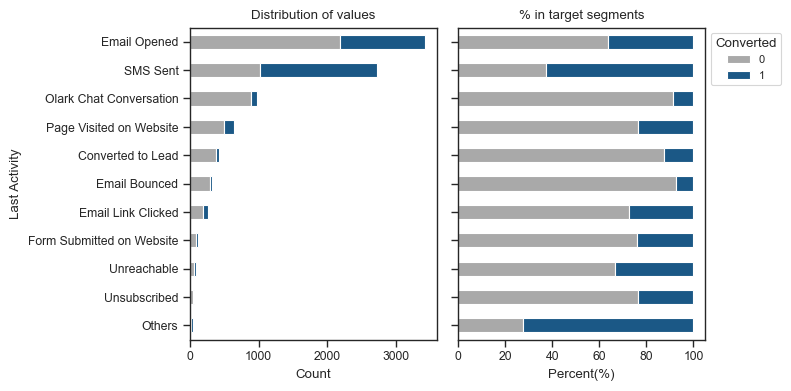

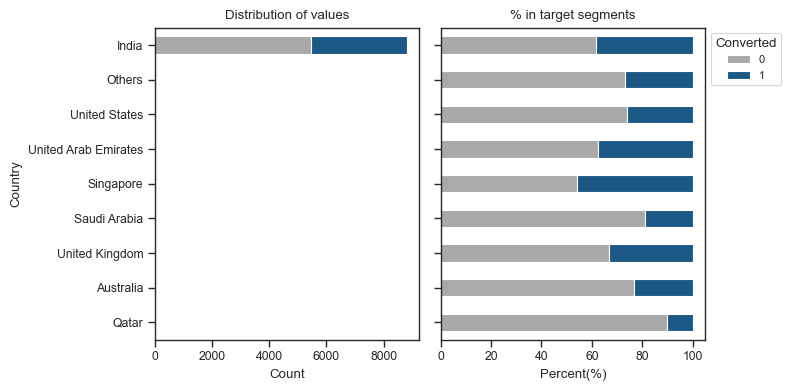

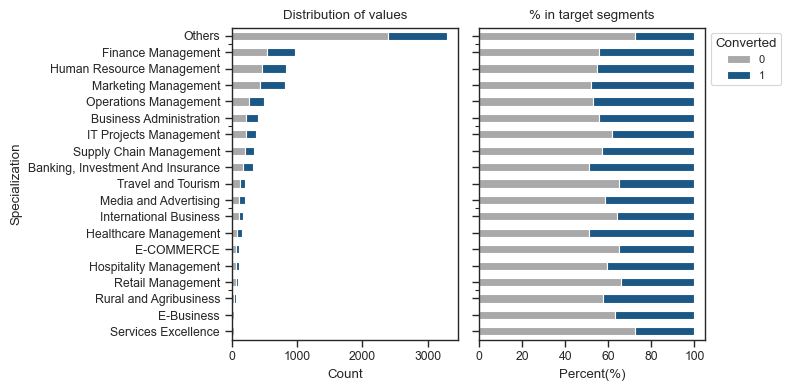

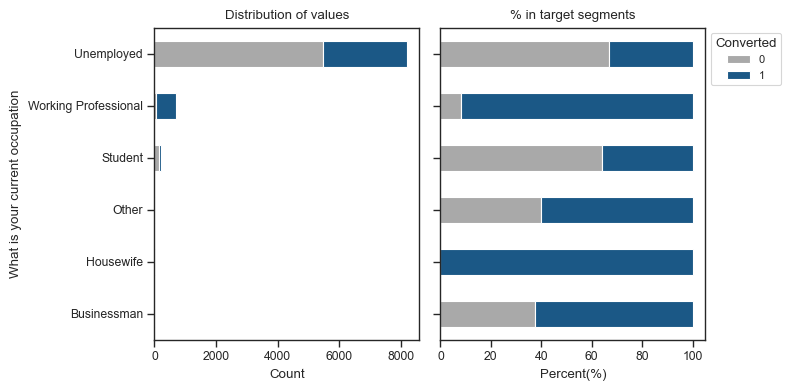

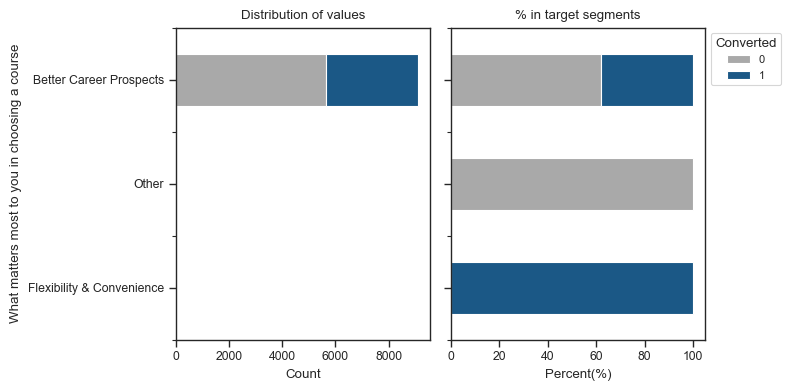

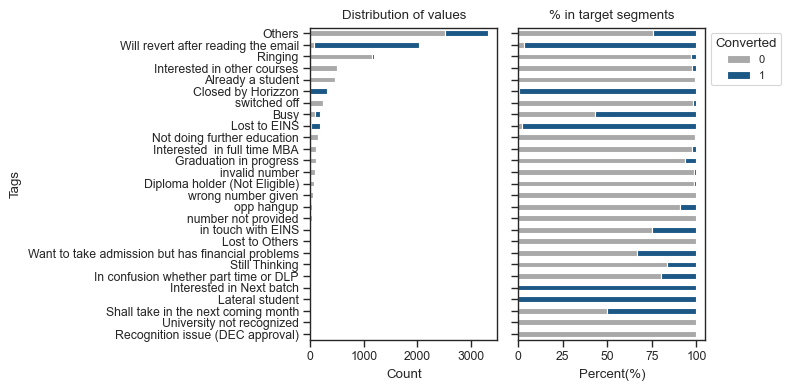

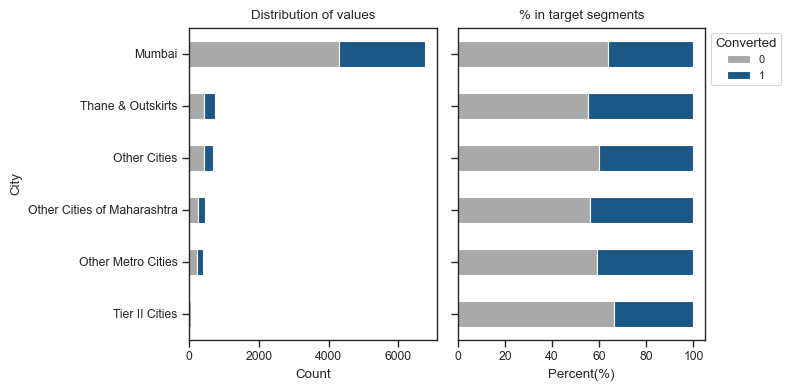

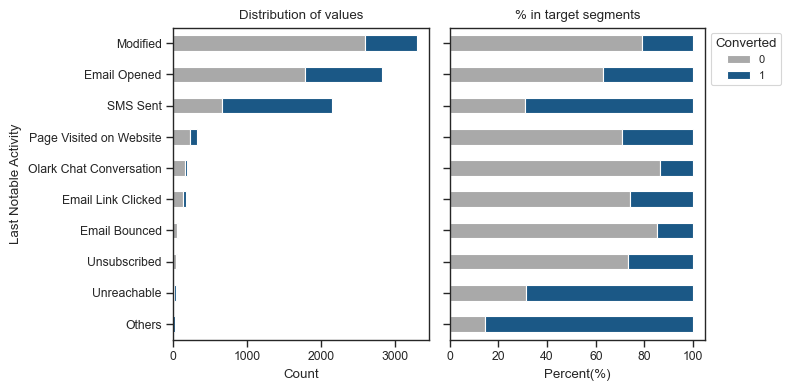

In [63]:
# Distribution after Standardization
for col in multi_cols:
    bi_plot(data=clean_leads, col=col, target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)


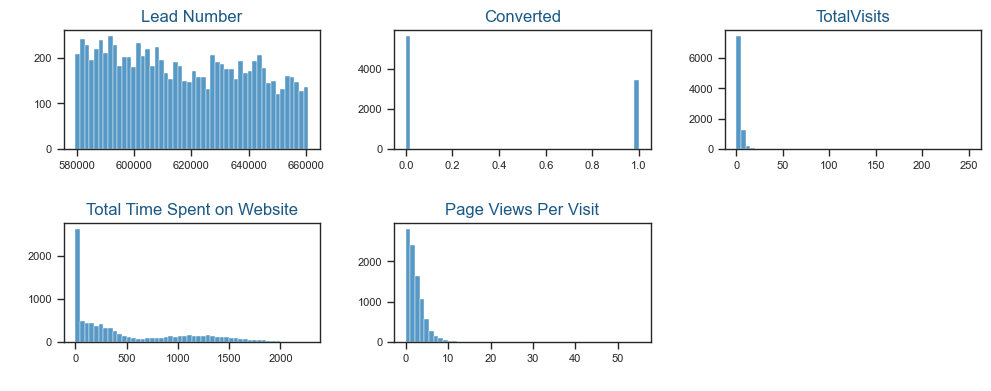

In [64]:
# Numerical Variables
c_cols = lead_data_structure[lead_data_structure.VARIABLE_TYPE == 'numerical']["COLUMN_NAME"]
plot_all(clean_leads, cols= c_cols, var_type='n', figsize=(10,4))

In [65]:
clean_leads[c_cols].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617061.661650,0.379216,3.454575,483.773921,2.368972
std,23365.404509,0.485219,4.851123,545.519186,2.157526
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,12.000000,1.000000
50%,615309.000000,0.000000,3.000000,247.000000,2.000000
75%,637208.000000,1.000000,5.000000,924.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


* No need correcting numerical variables

<br>



## 2 - EXPLORATORY DATA ANALYSIS

In [66]:
# remove unused columns & target column to analyze
lead_data_structure = lead_data_structure[~(lead_data_structure.COLUMN_NAME.isin(['Prospect ID', 'Lead Number', 
                                                                                  'Converted']))]


### Outliers

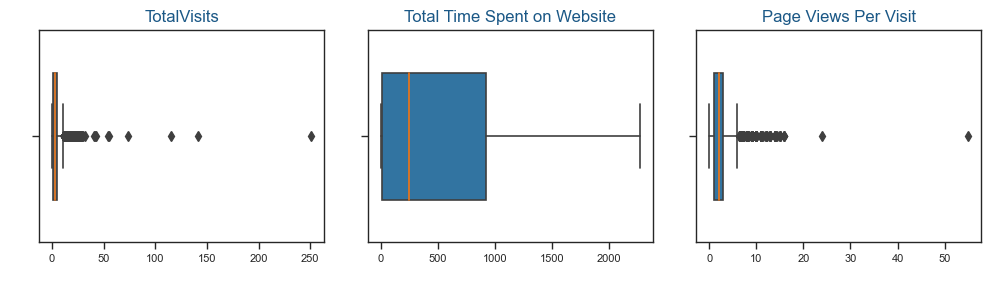

In [67]:
#Check numerical variables 
n_cols=lead_data_structure[lead_data_structure.VARIABLE_TYPE =='numerical']['COLUMN_NAME']
plot_all(data=clean_leads, cols=n_cols, var_type='n',nbins=20 ,chart='boxplot', figsize=(10,3))

In [68]:
clean_leads[n_cols].describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.454575,483.773921,2.368972
std,4.851123,545.519186,2.157526
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,924.000000,3.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


We can see:
* There are outliers in **TotalVisits** and **Page Views Per Visit**
* We can replace values greater than 95th percentile with median values


In [69]:
# Replace Outliers with median
percentile_95th = [np.percentile(clean_leads["TotalVisits"],95), np.percentile(clean_leads["Page Views Per Visit"],95)]
clean_leads["TotalVisits"][clean_leads["TotalVisits"] > percentile_95th[0]] = clean_leads["TotalVisits"].median()
clean_leads["Page Views Per Visit"][clean_leads["Page Views Per Visit"] > percentile_95th[1]] = clean_leads["Page Views Per Visit"].median()


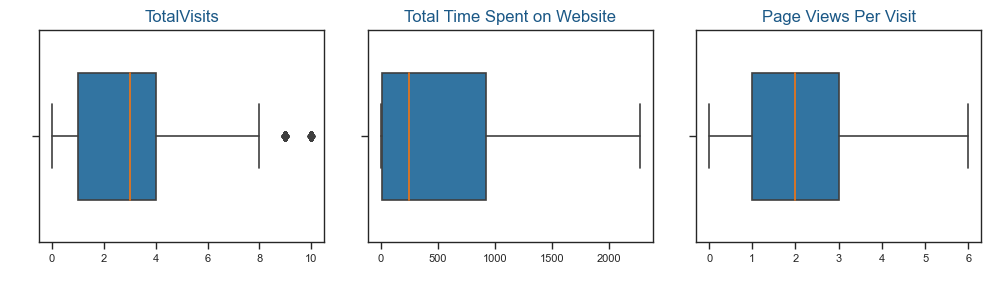

In [71]:
plot_all(data=clean_leads, cols=n_cols, var_type='n',nbins=20 ,chart='boxplot', figsize=(10,3))

### Imbalance checking

#### Checking target variable

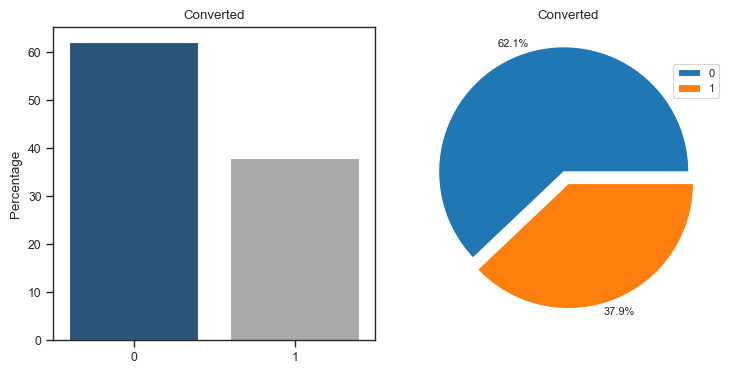

In [72]:
#filename = 'Images\\target_imbalance.png'
uni_plot(data=clean_leads, col='Converted', var_type='c',figsize=(8,4), face_highlight=True)

From the chart:
* 37.9% of observations are converted leads 
* The data is good enough to build model

### Distribution of data by target variable segments

#### Categorical Variables

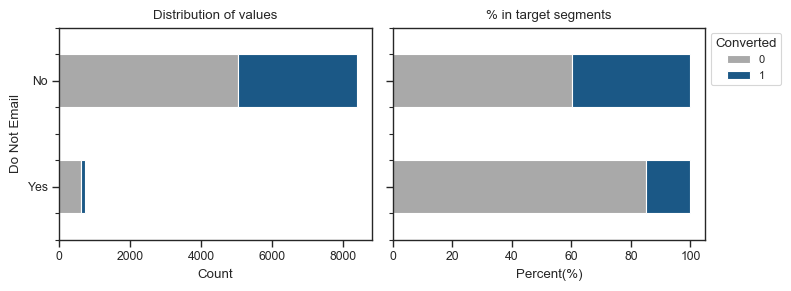

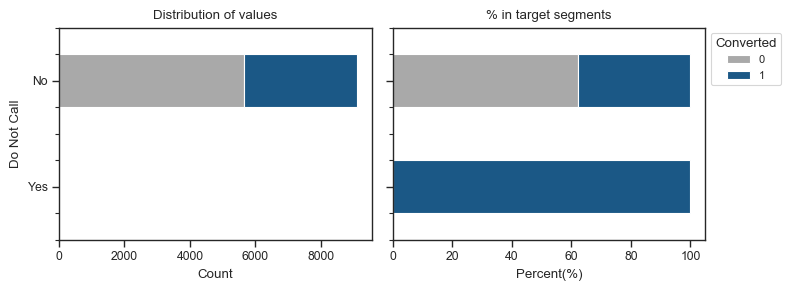

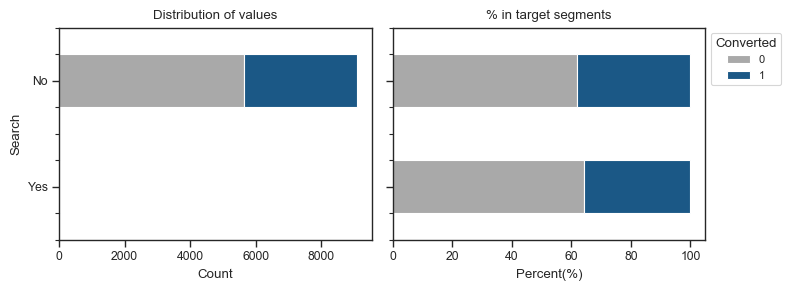

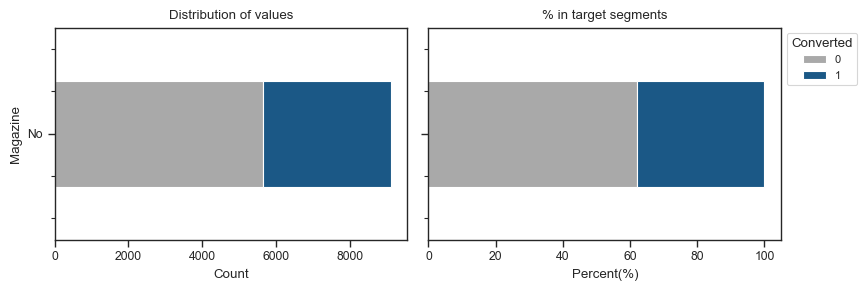

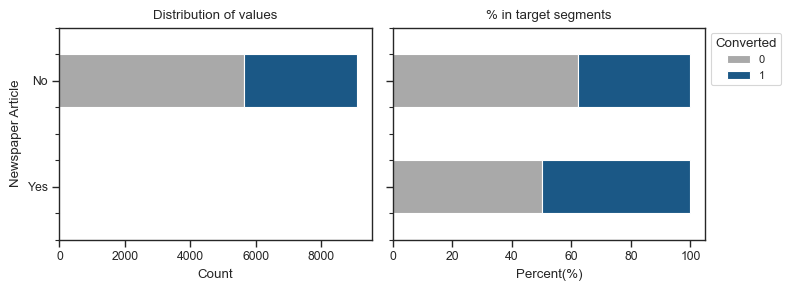

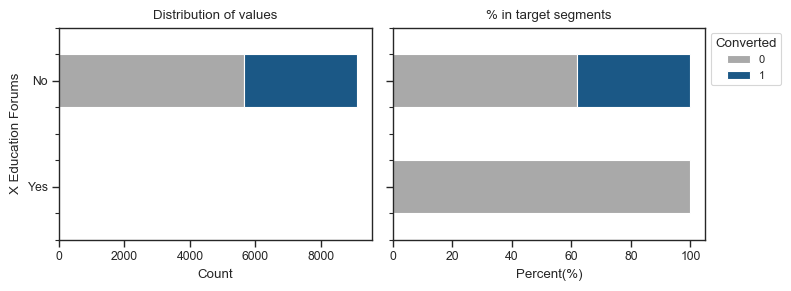

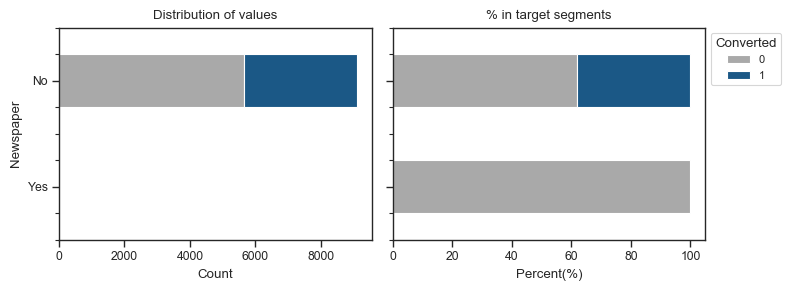

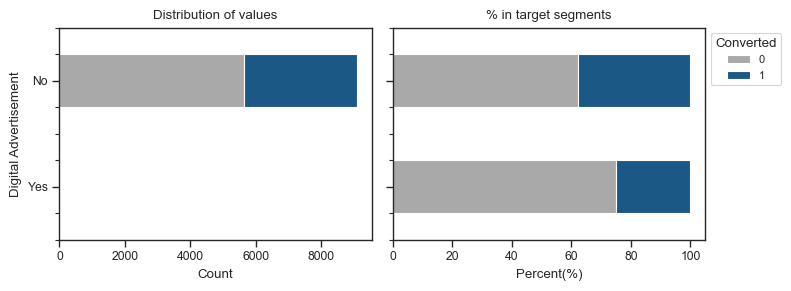

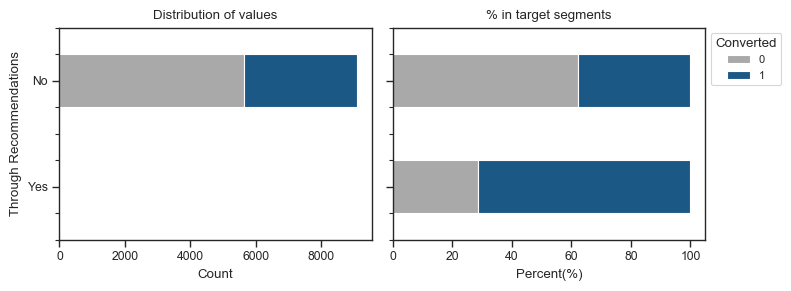

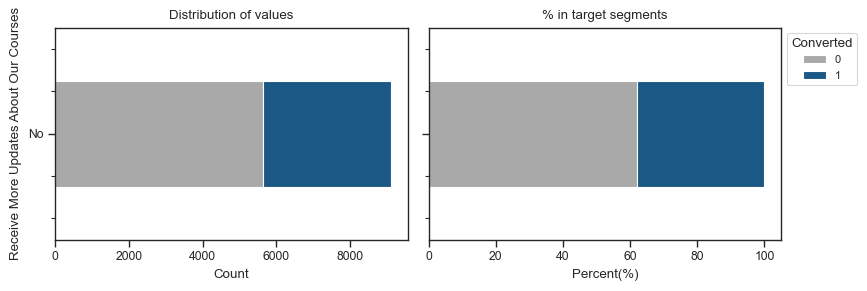

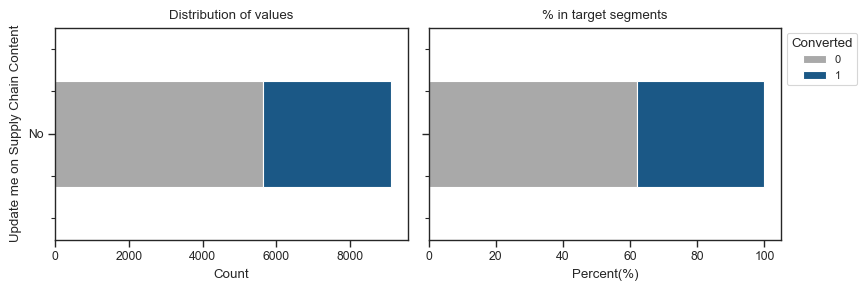

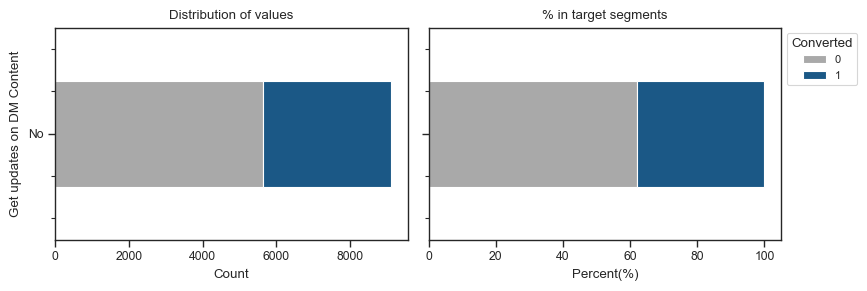

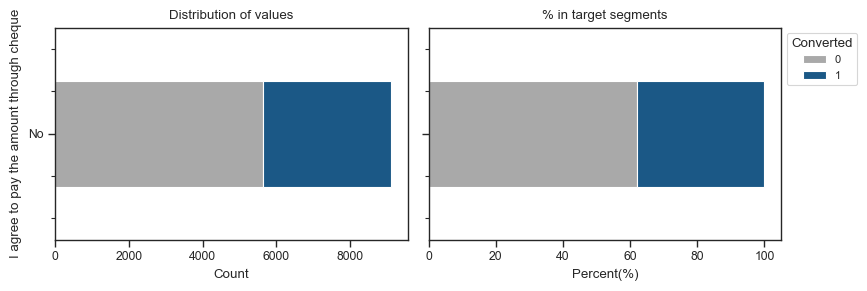

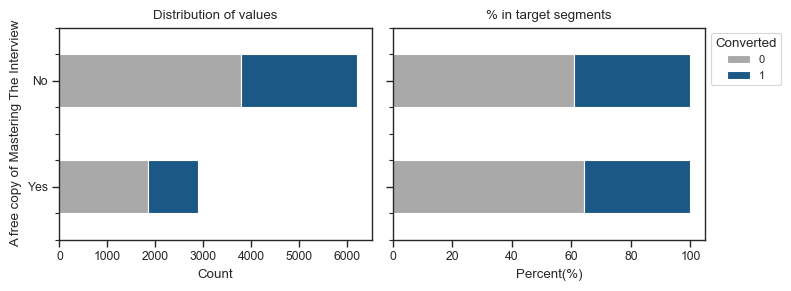

In [73]:
#c_cols = lead_data_structure[(lead_data_structure.VARIABLE_TYPE=='categorical')]
for col in bi_cols:
    bi_plot(data=clean_leads, col=col, target='Converted', var_type='c', figsize=(8,3),face_highlight=True , transform=True)

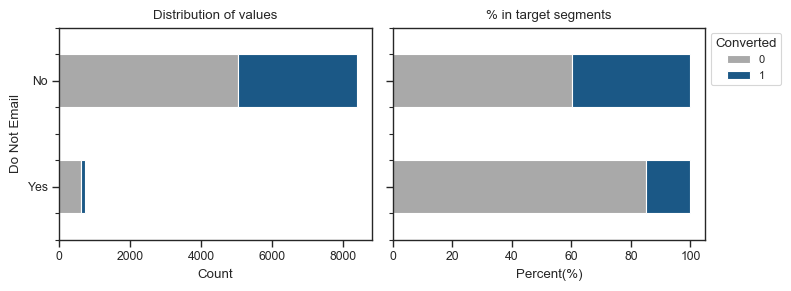

In [75]:
bi_plot(data=clean_leads, col='Do Not Email', target='Converted', var_type='c', figsize=(8,3),face_highlight=True , transform=True)

##### Inference from the graph:
* *Do not email*: Most of converted leads don't want to receive email.
* *Do Not Call*: Most of leads choose "No". No information inferred.
* *Search*: Most of values are "No". No information inferred.
* *Magazine*: All values are "No". No information inferred.
* *Newspaper Acticle*: Most of values are "No". No information inferred.
* *X Education Forums*: Most of values are "No". No information inferred.
* *Newspaper*: Most of values are "No". No information inferred.
* *Digital Advertisement*: Most of values are "No". No information inferred.
* *Through Recommendations*: Most of values are "No". No information inferred.
* *Receive More Updates About Our Courses*: All values are "No". No information inferred.
* *Update me on Supply Chain Content*: All values are "No". No information inferred.
* *Get updates on DM Content*: All values are "No". No information inferred.
* *I agree to pay the amount through cheque*: All values are "No". No information inferred.
* *A free copy of Mastering The Interview*: The proportions of "Yes" in converted and none-converted lead are about the same. No information inferred.

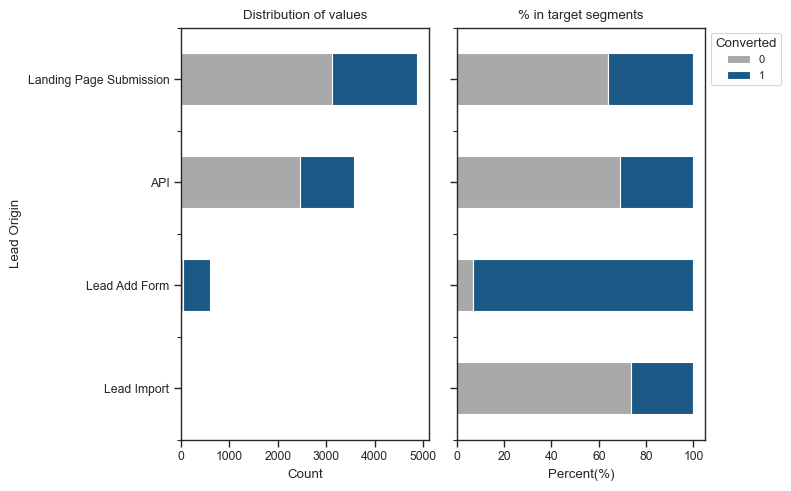

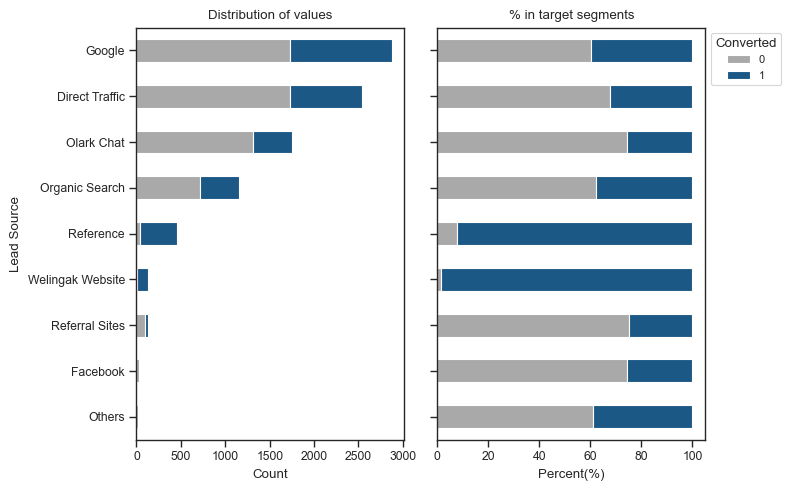

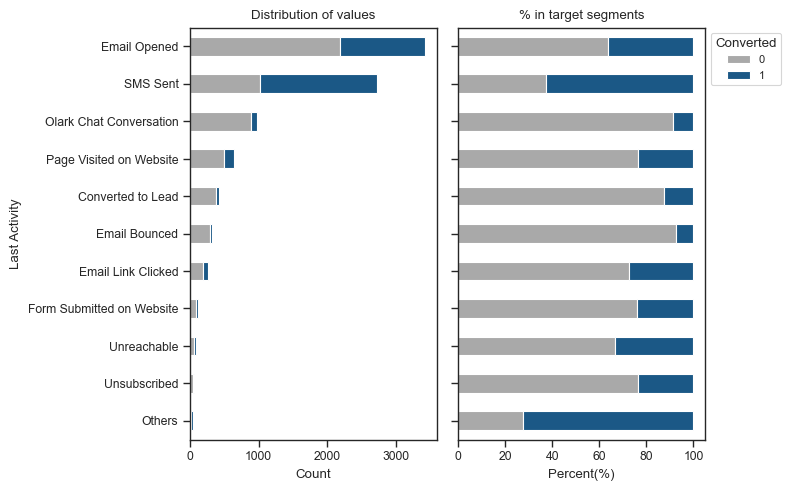

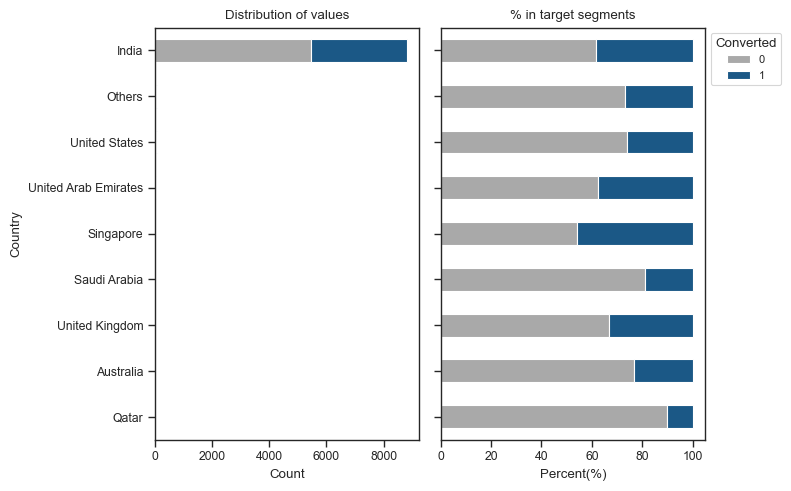

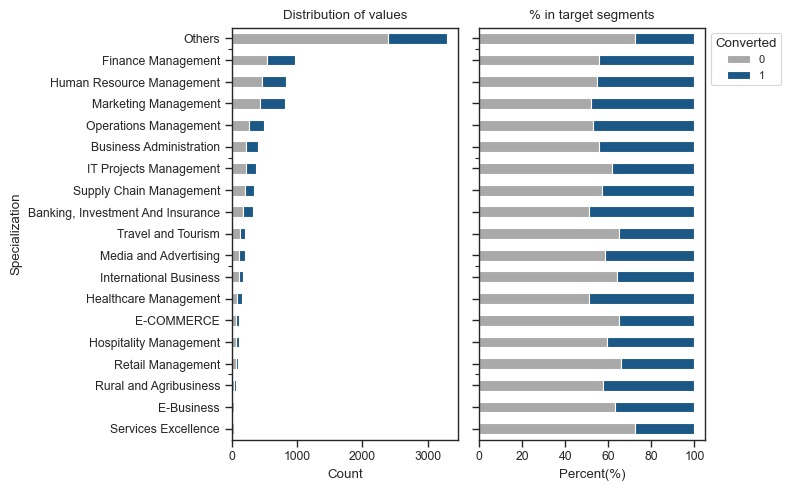

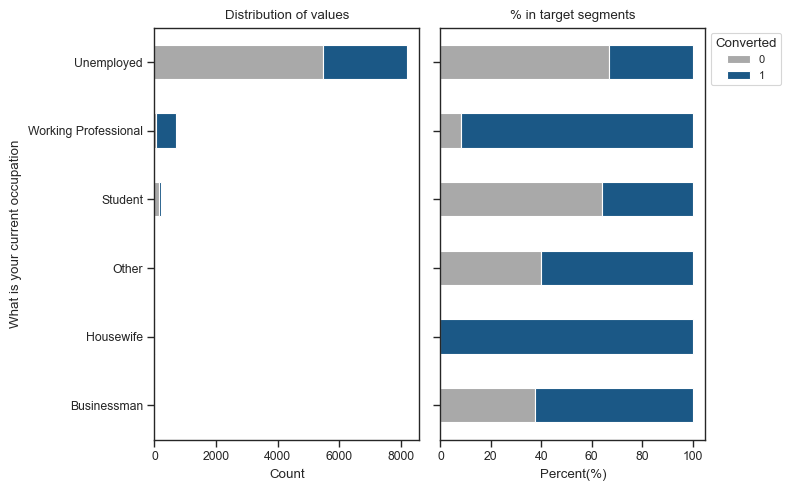

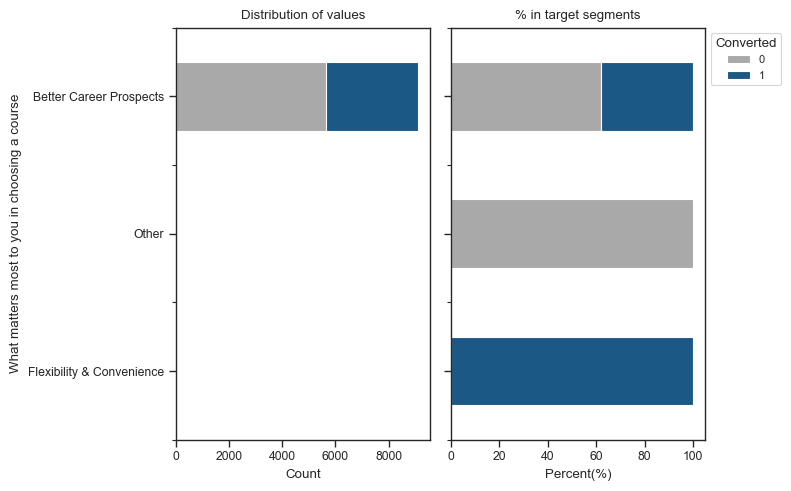

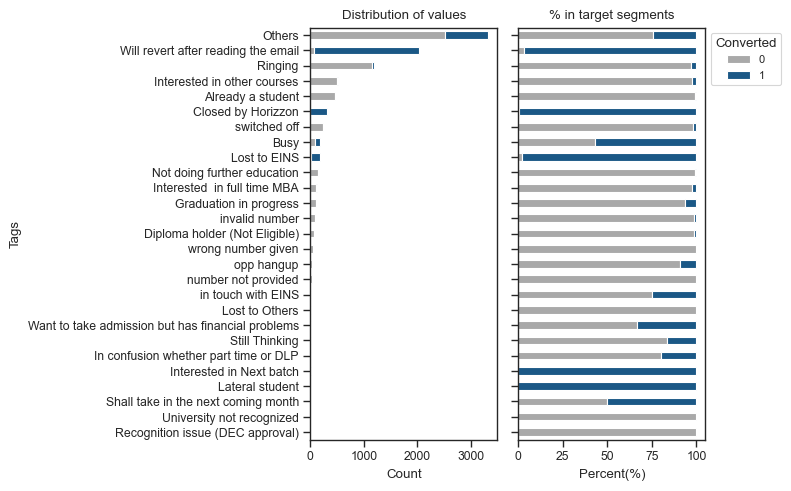

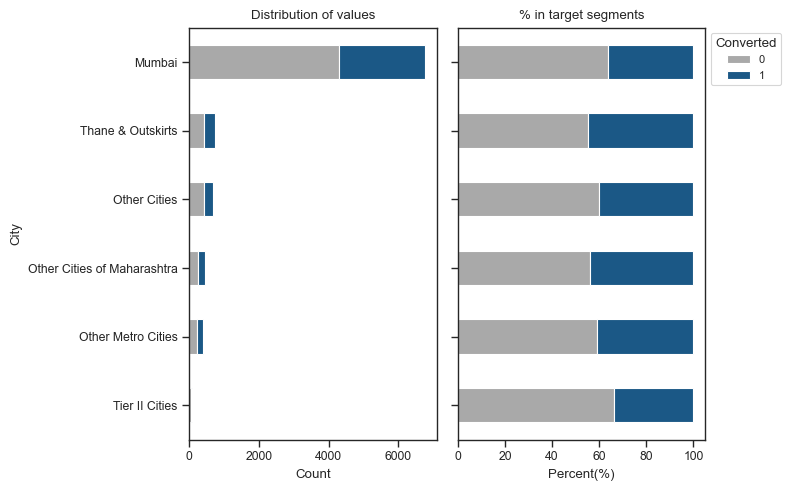

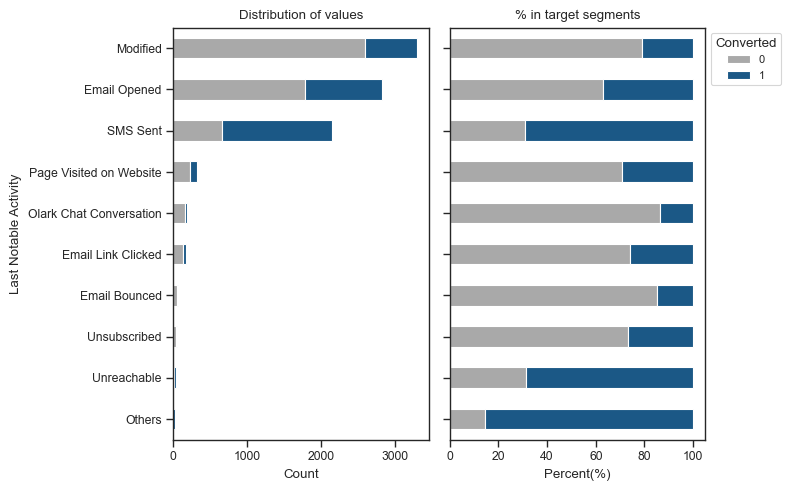

In [76]:
# Multi-classes categorical Variable
for col in multi_cols:
    bi_plot(data=clean_leads, col=col, target='Converted' ,var_type='c', figsize=(8,5),  
            transform=True, face_highlight=True)


##### Lead Origin

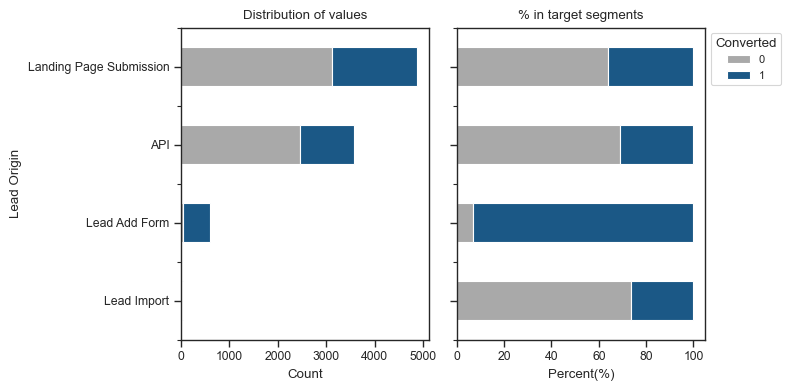

In [77]:
bi_plot(data=clean_leads, col='Lead Origin', target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)


##### Lead Source

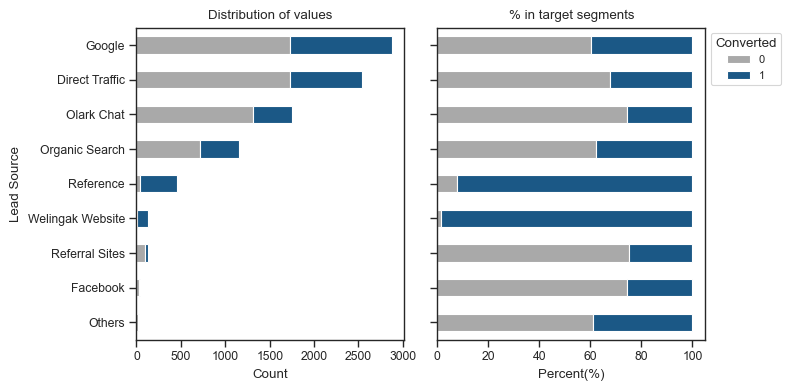

In [78]:
bi_plot(data=clean_leads, col='Lead Source', target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)


##### Last Activity

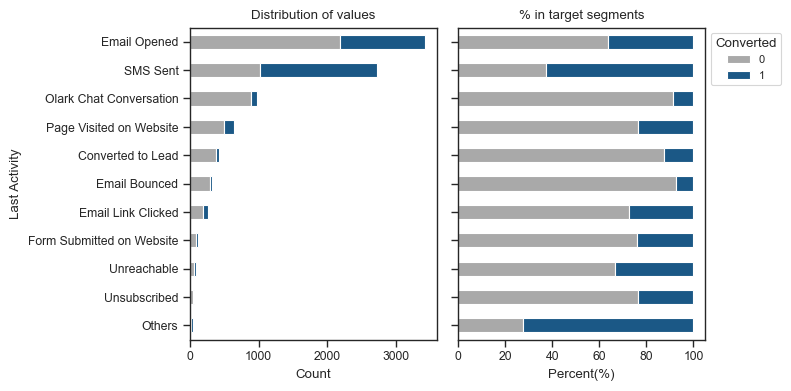

In [79]:
bi_plot(data=clean_leads, col='Last Activity', target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)

##### Specialization

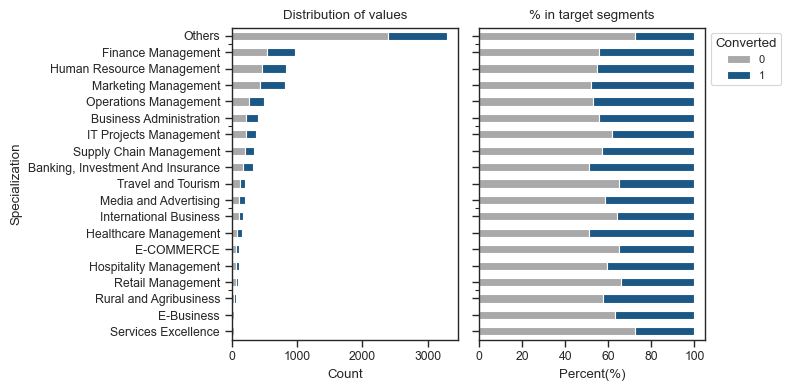

In [80]:
bi_plot(data=clean_leads, col='Specialization', target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)

##### City

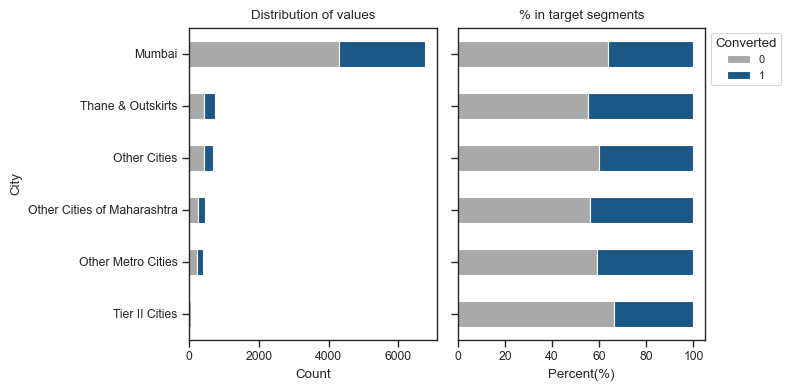

In [81]:
bi_plot(data=clean_leads, col='City', target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)

##### Last Notable Activity

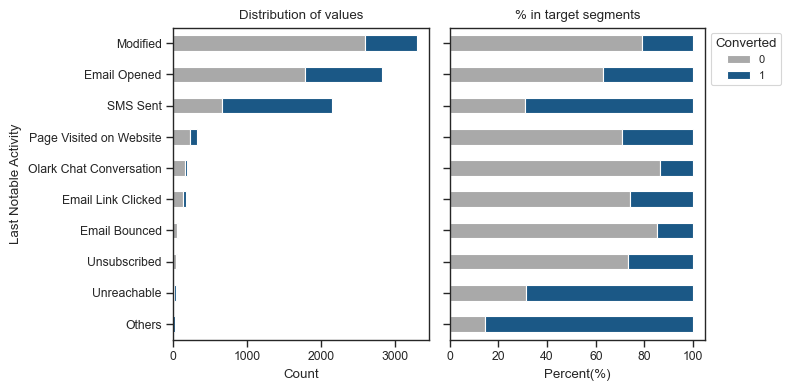

In [82]:
bi_plot(data=clean_leads, col='Last Notable Activity', target='Converted' ,var_type='c', figsize=(8,4),  
            transform=True, face_highlight=True)

**Inference from charts:** 
* *Lead Origin*: Most of leads come from Landing Page Submission and API, but Lead Add Form has highest conversion rate
* *Lead Source*: The most of leads come from Google and Direct Traffic, but almost all leads from Reference and Welingak Website are converted leads.
* *Last Activity*: Most of leads have last activity is Email Openned, but SMS Sent last activity has highest conversion rate. 
* *Country*: Most of leads from India. No information inferred
* *Specialization*: Most of leads have 'Others' Specialization (Unidentified). Proportion of converted leads is relatively lower than that in other segment.
* *What is your current occupation*: Most of Leads is Unemployed. Leads with Working Professional Occupation are more likely to be converted lead.
* *What matters most to you in choosing a course*: Almost all of lead's answers are "Better Career Prospects". No information inferred
* *Tags*: Since this is a column which is generated by the sales team for their analysis , so this will not be used for model building.
* *City*: Most of leads from Mumbai. No information inferred.
* *Last Notable Activity*: It's about the same to "Last Activity" variable

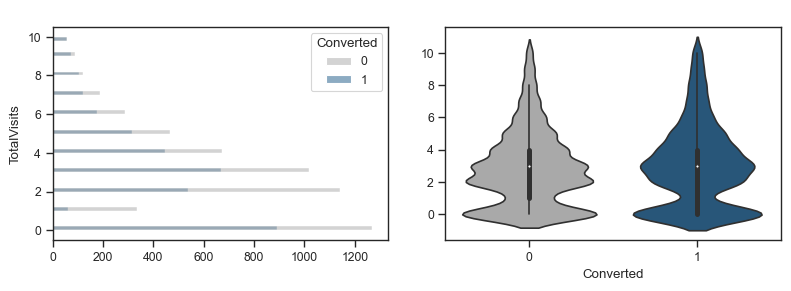

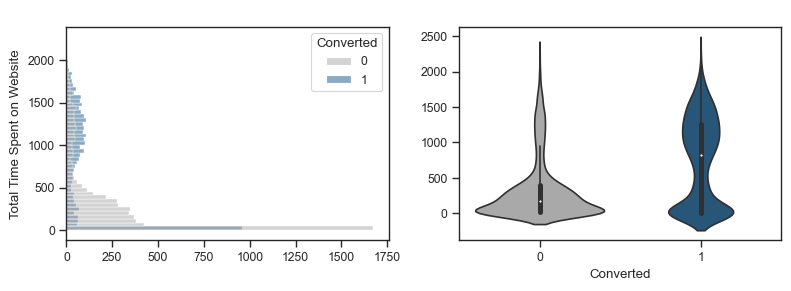

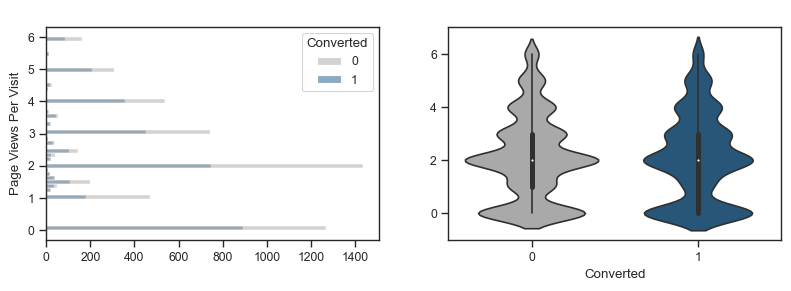

In [83]:
### Numerical columns
#n_cols = lead_data_structure[(lead_data_structure.VARIABLE_TYPE=='numerical')]
for col in n_cols:
    bi_plot(data=clean_leads, col=col, target='Converted', var_type='n', figsize=(8,3))

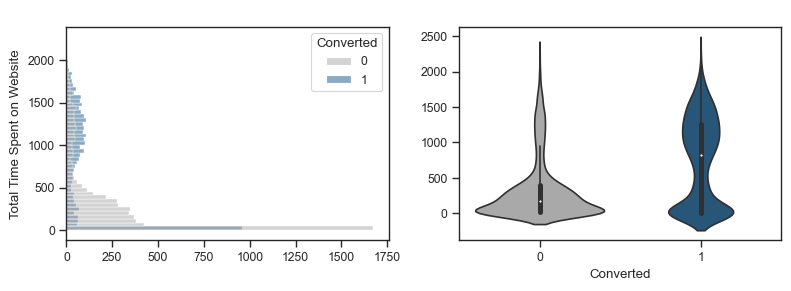

In [84]:
bi_plot(data=clean_leads, col='Total Time Spent on Website', target='Converted', var_type='n', figsize=(8,3))

**Inference from charts:** 
* *TotalVisits*: Since distribution of values in converted and none-converted leads are about the same, nothing inferred.
* *Total Time Spent on Website*: Leads spending more time on website tend to be hot leads
* *Page Views Per Visit*: Since distribution of values in converted and none-converted leads are about the same, nothing inferred.

#### Conclusion:
Based on the above analysis we have seen that many columns contain too imbalanced data, and they will not adding any information to the model, hence we can drop them before building model.

In [85]:
bi_cols

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [86]:
clean_leads.drop(['Do Not Call',
                 'Search',
                 'Magazine',
                 'Newspaper Article',
                 'X Education Forums',
                 'Newspaper',
                 'Digital Advertisement',
                 'Through Recommendations',
                 'Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content',
                 'I agree to pay the amount through cheque',], axis=1, inplace=True)

In [87]:
multi_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [88]:
clean_leads.drop(['Country',
                 'What matters most to you in choosing a course',
                 'Tags',
                 ], axis=1, inplace=True)


In [89]:
# Drop lead Number
clean_leads.drop(['Lead Number'], axis=1, inplace=True)

In [90]:
clean_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

## 3 - Data Preparation for Model Building

### Treating categorical variables

In [91]:
# Mapping value to binary variables
clean_leads['Do Not Email'] = clean_leads['Do Not Email'].map({'Yes':1, 'No':0})
clean_leads['A free copy of Mastering The Interview'] = clean_leads['A free copy of Mastering The Interview'].map({'Yes':1, 'No':0})

In [92]:
clean_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9103 non-null   object 
 3   Do Not Email                            9103 non-null   int64  
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

In [93]:
new_structure = examine_data(clean_leads)
new_structure

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
0,Prospect ID,0,object,0.0,categorical,NA
1,Lead Origin,0,object,0.0,categorical,NA
2,Lead Source,0,object,0.0,categorical,NA
3,Do Not Email,0,int64,0.0,numerical,NA
4,Converted,0,int64,0.0,numerical,NA
5,TotalVisits,0,float64,0.0,numerical,NA
6,Total Time Spent on Website,0,int64,0.0,numerical,NA
7,Page Views Per Visit,0,float64,0.0,numerical,NA
8,Last Activity,0,object,0.0,categorical,NA
9,Specialization,0,object,0.0,categorical,NA


##### Creating dummy variables

In [94]:
c_cols = new_structure.COLUMN_NAME[(new_structure.VARIABLE_TYPE == 'categorical') & (new_structure.COLUMN_NAME != 'Prospect ID')]
dummies = pd.get_dummies(clean_leads[c_cols], drop_first=True)
lead_data = pd.concat([clean_leads, dummies], axis=1)

In [95]:
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [96]:
lead_data.shape

(9103, 72)

In [97]:
# Drop categorical variables
lead_data.drop(c_cols, axis=1, inplace=True)

In [98]:
lead_data.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.079205,0.379216,2.919807,483.773921,2.106907,0.317258,0.536636,0.065912,0.004174,0.004284,0.315610,0.192794,0.126771,0.002527,0.050752,0.013732,0.014171,0.035263,0.029331,0.377019,0.012743,0.106888,0.005603,0.070306,0.299132,0.010216,0.006481,0.044161,0.006262,0.012194,0.105789,0.017137,0.012194,0.092058,0.040207,0.019554,0.090520,0.022190,0.054817,0.362518,0.010985,0.008019,0.004394,0.038009,0.022190,0.000989,0.001648,0.022630,0.898825,0.075030,0.074701,0.049434,0.041525,0.082171,0.008129,0.019005,0.310118,0.362078,0.020103,0.002307,0.034934,0.236406,0.003515,0.004943
std,0.270073,0.485219,2.416013,545.519186,1.619778,0.465434,0.498683,0.248142,0.064479,0.065318,0.464784,0.394514,0.332735,0.050205,0.219504,0.116382,0.118203,0.184454,0.168742,0.484666,0.112170,0.308988,0.074644,0.255677,0.457903,0.100564,0.080250,0.205465,0.078887,0.109756,0.307585,0.129790,0.109756,0.289123,0.196454,0.138469,0.286941,0.147311,0.227635,0.480754,0.104240,0.089196,0.066146,0.191230,0.147311,0.031430,0.040562,0.148729,0.301577,0.263455,0.262922,0.216785,0.199511,0.274640,0.089800,0.136549,0.462567,0.480628,0.140361,0.047978,0.183622,0.424897,0.059189,0.070139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [99]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9103 non-null   object 
 1   Do Not Email                                          9103 non-null   int64  
 2   Converted                                             9103 non-null   int64  
 3   TotalVisits                                           9103 non-null   float64
 4   Total Time Spent on Website                           9103 non-null   int64  
 5   Page Views Per Visit                                  9103 non-null   float64
 6   A free copy of Mastering The Interview                9103 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9103

### Splitting the Data into Train and Test sets.

In [101]:
from sklearn.model_selection import train_test_split

# Feature variable data
X = lead_data.drop(['Prospect ID', 'Converted'], axis=1)

# Target variable
y = lead_data['Converted']

In [102]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the Data

In [103]:
from sklearn.preprocessing import StandardScaler

# Initiating Scaler
scaler = StandardScaler()

# data scaling
n_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[n_cols] = scaler.fit_transform(X_train[n_cols])

In [104]:
X_train[n_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.372000e+03,6.372000e+03,6.372000e+03
mean,-1.561142e-17,2.899264e-17,2.676244e-17
std,1.000078e+00,1.000078e+00,1.000078e+00
min,-1.197162e+00,-8.908323e-01,-1.290693e+00
25%,-7.855329e-01,-8.780590e-01,-6.733525e-01
50%,3.772625e-02,-4.346432e-01,-5.601211e-02
75%,4.493558e-01,8.121218e-01,5.613283e-01
max,2.919133e+00,3.220344e+00,2.413349e+00


## 4 - Building Model and Making Predictions

### Building logistic regression model

##### Feature Selection Using RFE

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

# Running RFE with 20 features selected
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 30),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('A free copy of Mastering The Interview', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Others', False, 29),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 15),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_S

In [108]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### Assessing the model with StatsModels
##### Model 1

In [109]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.3
Date:                Tue, 19 Dec 2023   Deviance:                       5246.6
Time:                        23:19:12   Pearson chi2:                 7.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3990
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3454      0.240      1.442      0.149      -0.124       0.815
Do Not Email                                            -1.2844      0.178     -7.232      0.000      -1.632      -0.936
Total Time Spent on Website                              1.0961      0.040     27.317      0.000       1.017       1.175
Lead Origin_Landing Page Submission                     -1.1734      0.128     -9.187      0.000      -1.424      -0.923
Lead Origin_Lead Add Form                                1.1975      0.959      1.249      0.212      -0.681       3.076
Lead Source_Olark Chat                                   1.0351      0.122      8.452      0.000       0.795       1.275
Lead Source_Reference                                    2.1994      0.980      2.245      0.025       0.279       4.120
Lead Source_Welingak Website                             5.2268      1.393      3.752      0.000       2.497       7.957
Last Activity_Olark Chat Conversation                   -1.0080      0.171     -5.886      0.000      -1.344      -0.672
Last Activity_Others                                     0.8375      0.538      1.558      0.119      -0.216       1.891
Last Activity_SMS Sent                                   0.6852      0.160      4.289      0.000       0.372       0.998
Last Activity_Unsubscribed                               0.9329      0.456      2.045      0.041       0.039       1.827
Specialization_Hospitality Management                   -0.9049      0.321     -2.818      0.005      -1.534      -0.276
Specialization_Others                                   -1.1841      0.124     -9.566      0.000      -1.427      -0.941
What is your current occupation_Housewife               22.0182   1.84e+04      0.001      0.999   -3.61e+04    3.61e+04
What is your current occupation_Unemployed              -0.4894      0.212     -2.311      0.021      -0.905      -0.074
What is your current occupation_Working Professional     2.0623      0.281      7.346      0.000       1.512       2.613
Last Notable Activity_Modified                          -0.6736      0.096     -6.987      0.000      -0.862      -0.485
Last Notable Activity_Others                             1.9197      0.950      2.020      0.043       0.057       3.782
Last Notable Activity_SMS Sent                           0.7907      0.180      4.394      0.000       0.438       1.143
Last Notable Activity_Unreachable                        1.1595      0.531      2.182      0.029       0.118       2.201
========================================================================================================================
"""

* P-value of *What is your current occupation_Housewife* is very high, we drop this feature

In [110]:
cols = cols.drop('What is your current occupation_Housewife')

##### Model 2

In [111]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.5
Date:                Tue, 19 Dec 2023   Deviance:                       5251.1
Time:                        23:19:25   Pearson chi2:                 7.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4077      0.236      1.725      0.085      -0.056       0.871
Do Not Email                                            -1.2873      0.178     -7.250      0.000      -1.635      -0.939
Total Time Spent on Website                              1.0964      0.040     27.328      0.000       1.018       1.175
Lead Origin_Landing Page Submission                     -1.1726      0.128     -9.187      0.000      -1.423      -0.922
Lead Origin_Lead Add Form                                1.1976      0.958      1.250      0.211      -0.681       3.076
Lead Source_Olark Chat                                   1.0345      0.122      8.447      0.000       0.794       1.275
Lead Source_Reference                                    2.2050      0.979      2.251      0.024       0.285       4.125
Lead Source_Welingak Website                             5.2287      1.393      3.754      0.000       2.499       7.959
Last Activity_Olark Chat Conversation                   -1.0130      0.171     -5.914      0.000      -1.349      -0.677
Last Activity_Others                                     0.8343      0.538      1.551      0.121      -0.220       1.888
Last Activity_SMS Sent                                   0.6810      0.160      4.263      0.000       0.368       0.994
Last Activity_Unsubscribed                               0.9352      0.456      2.051      0.040       0.042       1.829
Specialization_Hospitality Management                   -0.9090      0.321     -2.832      0.005      -1.538      -0.280
Specialization_Others                                   -1.1857      0.124     -9.585      0.000      -1.428      -0.943
What is your current occupation_Unemployed              -0.5520      0.208     -2.653      0.008      -0.960      -0.144
What is your current occupation_Working Professional     1.9989      0.278      7.194      0.000       1.454       2.544
Last Notable Activity_Modified                          -0.6695      0.096     -6.955      0.000      -0.858      -0.481
Last Notable Activity_Others                             1.9223      0.950      2.023      0.043       0.060       3.785
Last Notable Activity_SMS Sent                           0.7950      0.180      4.419      0.000       0.442       1.148
Last Notable Activity_Unreachable                        1.1600      0.531      2.183      0.029       0.118       2.202
========================================================================================================================
"""

* P-value of *Lead Origin_Lead Add Form* is very high, we drop this feature

In [112]:
cols = cols.drop('Lead Origin_Lead Add Form')

##### Model 3

In [113]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.4
Date:                Tue, 19 Dec 2023   Deviance:                       5252.7
Time:                        23:19:45   Pearson chi2:                 7.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3984
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4224      0.236      1.789      0.074      -0.040       0.885
Do Not Email                                            -1.2879      0.178     -7.253      0.000      -1.636      -0.940
Total Time Spent on Website                              1.0950      0.040     27.312      0.000       1.016       1.174
Lead Origin_Landing Page Submission                     -1.1879      0.127     -9.343      0.000      -1.437      -0.939
Lead Source_Olark Chat                                   1.0292      0.122      8.412      0.000       0.789       1.269
Lead Source_Reference                                    3.3919      0.239     14.186      0.000       2.923       3.860
Lead Source_Welingak Website                             6.4206      1.015      6.324      0.000       4.431       8.410
Last Activity_Olark Chat Conversation                   -1.0151      0.171     -5.926      0.000      -1.351      -0.679
Last Activity_Others                                     0.8340      0.538      1.551      0.121      -0.220       1.888
Last Activity_SMS Sent                                   0.6798      0.160      4.256      0.000       0.367       0.993
Last Activity_Unsubscribed                               0.9337      0.456      2.048      0.041       0.040       1.827
Specialization_Hospitality Management                   -0.9115      0.321     -2.839      0.005      -1.541      -0.282
Specialization_Others                                   -1.1977      0.123     -9.704      0.000      -1.440      -0.956
What is your current occupation_Unemployed              -0.5499      0.208     -2.642      0.008      -0.958      -0.142
What is your current occupation_Working Professional     1.9981      0.278      7.188      0.000       1.453       2.543
Last Notable Activity_Modified                          -0.6705      0.096     -6.966      0.000      -0.859      -0.482
Last Notable Activity_Others                             1.9174      0.950      2.018      0.044       0.055       3.780
Last Notable Activity_SMS Sent                           0.7954      0.180      4.421      0.000       0.443       1.148
Last Notable Activity_Unreachable                        1.1557      0.532      2.174      0.030       0.114       2.197
========================================================================================================================
"""

* We drop *Last Activity_Others* because of it's high p-value

In [114]:
cols = cols.drop('Last Activity_Others')

##### Model 4

In [115]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.5
Date:                Tue, 19 Dec 2023   Deviance:                       5255.1
Time:                        23:20:07   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3982
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4158      0.236      1.761      0.078      -0.047       0.879
Do Not Email                                            -1.2920      0.177     -7.280      0.000      -1.640      -0.944
Total Time Spent on Website                              1.0957      0.040     27.335      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1848      0.127     -9.320      0.000      -1.434      -0.936
Lead Source_Olark Chat                                   1.0311      0.122      8.427      0.000       0.791       1.271
Lead Source_Reference                                    3.3988      0.239     14.227      0.000       2.931       3.867
Lead Source_Welingak Website                             6.4190      1.015      6.323      0.000       4.429       8.409
Last Activity_Olark Chat Conversation                   -1.0286      0.171     -6.014      0.000      -1.364      -0.693
Last Activity_SMS Sent                                   0.6624      0.159      4.160      0.000       0.350       0.975
Last Activity_Unsubscribed                               0.9345      0.456      2.050      0.040       0.041       1.828
Specialization_Hospitality Management                   -0.9154      0.321     -2.850      0.004      -1.545      -0.286
Specialization_Others                                   -1.1935      0.123     -9.671      0.000      -1.435      -0.952
What is your current occupation_Unemployed              -0.5466      0.208     -2.628      0.009      -0.954      -0.139
What is your current occupation_Working Professional     2.0103      0.278      7.231      0.000       1.465       2.555
Last Notable Activity_Modified                          -0.6536      0.095     -6.847      0.000      -0.841      -0.466
Last Notable Activity_Others                             2.6205      0.827      3.169      0.002       1.000       4.241
Last Notable Activity_SMS Sent                           0.8125      0.180      4.526      0.000       0.461       1.164
Last Notable Activity_Unreachable                        1.1559      0.532      2.174      0.030       0.114       2.198
========================================================================================================================
"""

* All features have p-value < 0.05. 
#### Checking VIF

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

vif(X_train[cols])

,Features,VIF
11,What is your current occupation_Unemployed,9.53
15,Last Notable Activity_SMS Sent,6.51
7,Last Activity_SMS Sent,6.28
2,Lead Origin_Landing Page Submission,5.69
10,Specialization_Others,3.90
13,Last Notable Activity_Modified,2.43
3,Lead Source_Olark Chat,2.29
6,Last Activity_Olark Chat Conversation,1.65
12,What is your current occupation_Working Professional,1.65
4,Lead Source_Reference,1.43


* Since *What is your current occupation_Unemployed* has high VIF, we drop that feature

In [117]:
cols = cols.drop('What is your current occupation_Unemployed')

##### Model 5

In [118]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2630.9
Date:                Tue, 19 Dec 2023   Deviance:                       5261.8
Time:                        23:20:30   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3976
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1051      0.127     -0.831      0.406      -0.353       0.143
Do Not Email                                            -1.2898      0.178     -7.263      0.000      -1.638      -0.942
Total Time Spent on Website                              1.0969      0.040     27.365      0.000       1.018       1.175
Lead Origin_Landing Page Submission                     -1.1899      0.127     -9.362      0.000      -1.439      -0.941
Lead Source_Olark Chat                                   1.0378      0.122      8.487      0.000       0.798       1.277
Lead Source_Reference                                    3.4127      0.239     14.302      0.000       2.945       3.880
Lead Source_Welingak Website                             6.4137      1.015      6.318      0.000       4.424       8.403
Last Activity_Olark Chat Conversation                   -1.0153      0.171     -5.953      0.000      -1.350      -0.681
Last Activity_SMS Sent                                   0.6504      0.159      4.089      0.000       0.339       0.962
Last Activity_Unsubscribed                               0.9147      0.456      2.005      0.045       0.021       1.809
Specialization_Hospitality Management                   -0.9083      0.322     -2.820      0.005      -1.540      -0.277
Specialization_Others                                   -1.2035      0.124     -9.744      0.000      -1.446      -0.961
What is your current occupation_Working Professional     2.5392      0.192     13.212      0.000       2.162       2.916
Last Notable Activity_Modified                          -0.6585      0.095     -6.903      0.000      -0.845      -0.472
Last Notable Activity_Others                             2.5989      0.827      3.143      0.002       0.978       4.220
Last Notable Activity_SMS Sent                           0.8096      0.179      4.513      0.000       0.458       1.161
Last Notable Activity_Unreachable                        1.1353      0.532      2.136      0.033       0.093       2.177
========================================================================================================================
"""

In [119]:
# checking VIF
vif(X_train[cols])

,Features,VIF
14,Last Notable Activity_SMS Sent,6.46
7,Last Activity_SMS Sent,6.28
12,Last Notable Activity_Modified,2.33
10,Specialization_Others,2.21
3,Lead Source_Olark Chat,2.08
2,Lead Origin_Landing Page Submission,1.78
6,Last Activity_Olark Chat Conversation,1.65
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.23
0,Do Not Email,1.22


* We drop *Last Notable Activity_SMS Sent* because of it's high VIF

In [120]:
cols = cols.drop('Last Notable Activity_SMS Sent')

##### Model 6

In [121]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.3
Date:                Tue, 19 Dec 2023   Deviance:                       5282.5
Time:                        23:21:18   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0394      0.126     -0.313      0.754      -0.286       0.207
Do Not Email                                            -1.2570      0.177     -7.086      0.000      -1.605      -0.909
Total Time Spent on Website                              1.0953      0.040     27.365      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1913      0.127     -9.350      0.000      -1.441      -0.942
Lead Source_Olark Chat                                   1.0257      0.122      8.420      0.000       0.787       1.264
Lead Source_Reference                                    3.3940      0.238     14.260      0.000       2.928       3.861
Lead Source_Welingak Website                             6.3314      1.014      6.245      0.000       4.344       8.318
Last Activity_Olark Chat Conversation                   -0.9086      0.169     -5.367      0.000      -1.240      -0.577
Last Activity_SMS Sent                                   1.2807      0.075     17.067      0.000       1.134       1.428
Last Activity_Unsubscribed                               0.8534      0.458      1.864      0.062      -0.044       1.751
Specialization_Hospitality Management                   -0.9123      0.319     -2.858      0.004      -1.538      -0.287
Specialization_Others                                   -1.1986      0.124     -9.685      0.000      -1.441      -0.956
What is your current occupation_Working Professional     2.5617      0.193     13.292      0.000       2.184       2.939
Last Notable Activity_Modified                          -0.8961      0.081    -11.029      0.000      -1.055      -0.737
Last Notable Activity_Others                             2.5320      0.827      3.062      0.002       0.911       4.153
Last Notable Activity_Unreachable                        1.0695      0.531      2.013      0.044       0.028       2.111
========================================================================================================================
"""

In [122]:
# Checking VIF
vif(X_train[cols])

,Features,VIF
10,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.07
12,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.61
7,Last Activity_SMS Sent,1.55
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.23
0,Do Not Email,1.22
11,What is your current occupation_Working Professional,1.19


* We drop *Last Activity_Unsubscribed* because of it's high p-value

In [123]:
cols = cols.drop('Last Activity_Unsubscribed')

##### Model 7

In [124]:
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.9
Date:                Tue, 19 Dec 2023   Deviance:                       5285.7
Time:                        23:21:39   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0322      0.126     -0.256      0.798      -0.279       0.214
Do Not Email                                            -1.1539      0.165     -6.987      0.000      -1.478      -0.830
Total Time Spent on Website                              1.0959      0.040     27.383      0.000       1.017       1.174
Lead Origin_Landing Page Submission                     -1.1940      0.127     -9.371      0.000      -1.444      -0.944
Lead Source_Olark Chat                                   1.0257      0.122      8.422      0.000       0.787       1.264
Lead Source_Reference                                    3.3842      0.238     14.236      0.000       2.918       3.850
Lead Source_Welingak Website                             6.3159      1.014      6.231      0.000       4.329       8.302
Last Activity_Olark Chat Conversation                   -0.9114      0.169     -5.385      0.000      -1.243      -0.580
Last Activity_SMS Sent                                   1.2704      0.075     16.997      0.000       1.124       1.417
Specialization_Hospitality Management                   -0.9017      0.318     -2.838      0.005      -1.525      -0.279
Specialization_Others                                   -1.1993      0.124     -9.693      0.000      -1.442      -0.957
What is your current occupation_Working Professional     2.5646      0.193     13.310      0.000       2.187       2.942
Last Notable Activity_Modified                          -0.9025      0.081    -11.121      0.000      -1.062      -0.743
Last Notable Activity_Others                             2.5216      0.828      3.046      0.002       0.899       4.144
Last Notable Activity_Unreachable                        1.0617      0.531      2.000      0.045       0.021       2.102
========================================================================================================================
"""

In [125]:
# Checking VIF
vif(X_train[cols])

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.07
11,Last Notable Activity_Modified,1.78
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.61
7,Last Activity_SMS Sent,1.55
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.23
10,What is your current occupation_Working Professional,1.19
0,Do Not Email,1.13


* We drop *Last Notable Activity_Unreachable* because of it's high p-value and to reduce the number of features

In [126]:
cols = cols.drop('Last Notable Activity_Unreachable')

##### Model 8

In [127]:
X_train_sm = sm.add_constant(X_train[cols])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.8
Date:                Tue, 19 Dec 2023   Deviance:                       5289.6
Time:                        23:22:31   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3950
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0176      0.126     -0.140      0.888      -0.264       0.228
Do Not Email                                            -1.1550      0.165     -6.994      0.000      -1.479      -0.831
Total Time Spent on Website                              1.0938      0.040     27.367      0.000       1.016       1.172
Lead Origin_Landing Page Submission                     -1.1990      0.127     -9.414      0.000      -1.449      -0.949
Lead Source_Olark Chat                                   1.0205      0.122      8.387      0.000       0.782       1.259
Lead Source_Reference                                    3.3782      0.238     14.218      0.000       2.913       3.844
Lead Source_Welingak Website                             6.3095      1.014      6.225      0.000       4.323       8.296
Last Activity_Olark Chat Conversation                   -0.9150      0.169     -5.408      0.000      -1.247      -0.583
Last Activity_SMS Sent                                   1.2629      0.075     16.927      0.000       1.117       1.409
Specialization_Hospitality Management                   -0.9056      0.318     -2.851      0.004      -1.528      -0.283
Specialization_Others                                   -1.2037      0.124     -9.731      0.000      -1.446      -0.961
What is your current occupation_Working Professional     2.5634      0.193     13.314      0.000       2.186       2.941
Last Notable Activity_Modified                          -0.9084      0.081    -11.207      0.000      -1.067      -0.750
Last Notable Activity_Others                             2.5106      0.828      3.033      0.002       0.888       4.133
========================================================================================================================
"""

In [128]:
# Checking VIF
vif(X_train[cols])

,Features,VIF
9,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.07
11,Last Notable Activity_Modified,1.77
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.61
7,Last Activity_SMS Sent,1.54
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.23
10,What is your current occupation_Working Professional,1.19
0,Do Not Email,1.13


* We drop *Specialization_Hospitality Management* to reduce number of variables

In [178]:
cols = cols.drop('Specialization_Hospitality Management')

##### Model 9

In [179]:
X_train_sm = sm.add_constant(X_train[cols])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.9
Date:                Tue, 19 Dec 2023   Deviance:                       5297.8
Time:                        23:29:42   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3942
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0376      0.125     -0.300      0.764      -0.283       0.208
Do Not Email                                            -1.1631      0.165     -7.038      0.000      -1.487      -0.839
Total Time Spent on Website                              1.0901      0.040     27.322      0.000       1.012       1.168
Lead Origin_Landing Page Submission                     -1.1896      0.127     -9.350      0.000      -1.439      -0.940
Lead Source_Olark Chat                                   1.0180      0.122      8.373      0.000       0.780       1.256
Lead Source_Reference                                    3.3436      0.236     14.144      0.000       2.880       3.807
Lead Source_Welingak Website                             6.3075      1.014      6.223      0.000       4.321       8.294
Last Activity_Olark Chat Conversation                   -0.9113      0.169     -5.393      0.000      -1.243      -0.580
Last Activity_SMS Sent                                   1.2599      0.075     16.909      0.000       1.114       1.406
Specialization_Others                                   -1.1813      0.123     -9.580      0.000      -1.423      -0.940
What is your current occupation_Working Professional     2.5389      0.192     13.213      0.000       2.162       2.916
Last Notable Activity_Modified                          -0.9082      0.081    -11.210      0.000      -1.067      -0.749
Last Notable Activity_Others                             2.5237      0.827      3.051      0.002       0.902       4.145
========================================================================================================================
"""

In [180]:
# Checking VIF
vif(X_train[cols])

,Features,VIF
8,Specialization_Others,2.16
3,Lead Source_Olark Chat,2.07
10,Last Notable Activity_Modified,1.77
2,Lead Origin_Landing Page Submission,1.69
6,Last Activity_Olark Chat Conversation,1.61
7,Last Activity_SMS Sent,1.54
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.22
9,What is your current occupation_Working Professional,1.18
0,Do Not Email,1.13


**Since all p-values are nearly 0 and VIFs < 5, Model 9 will be final model**

### Making predictions

In [181]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7963    0.987558
5521    0.035512
1951    0.875999
1553    0.549476
9170    0.236508
5097    0.236508
8953    0.706610
308     0.685626
5520    0.111160
1045    0.173676
dtype: float64

In [182]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98755773, 0.03551183, 0.87599854, 0.54947584, 0.23650753,
       0.23650753, 0.70661035, 0.68562563, 0.11116011, 0.17367604])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [183]:
y_train.index

Int64Index([7963, 5521, 1951, 1553, 9170, 5097, 8953,  308, 5520, 1045,
            ...
            4457,  833, 5742, 8031, 4226,  366,   82, 8170, 7054, 5736],
           dtype='int64', length=6372)

In [184]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.987558,7963
1,0,0.035512,5521
2,1,0.875999,1951
3,1,0.549476,1553
4,0,0.236508,9170


##### Choosing an arbitrary cut-off probability point: 0.5

In [185]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check some data
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.987558,7963,1
1,0,0.035512,5521,0
2,1,0.875999,1951,1
3,1,0.549476,1553,1
4,0,0.236508,9170,0


##### Making the Confusion matrix

In [186]:
from sklearn import metrics

# Confusion matrix
cfs_metrics = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(cfs_metrics)

[[3471  450]
 [ 732 1719]]


**The confusion matrix indicates as below:**

     Predicted            not_converted    converted 
     Actual
     -----------------------------------------------
     not_converted            3471             450       
     converted                732              1719      

In [187]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.8145009416195856


#### Metrics beyond simply accuracy

In [188]:
TP = cfs_metrics[1,1] # true positive 
TN = cfs_metrics[0,0] # true negatives
FP = cfs_metrics[0,1] # false positives
FN = cfs_metrics[1,0] # false negatives

In [189]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))


Sensitivity :  0.7013463892288861
Specificity :  0.8852333588370314
False Positive Rate : 0.11476664116296863
Positive Predictive Value : 0.7925311203319502
Negative predictive value : 0.8258386866523911


* **Our main objective is to increase the conversion rate, that means we need to increase value of Positive Predictive Value, while keeping  high Sensitivity as we will not ignore hot leads**
* **With cut-off value is 0.5, we have good Accuracy and Positive Predictive Value, but Sensitivity may not be good enough**

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [190]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

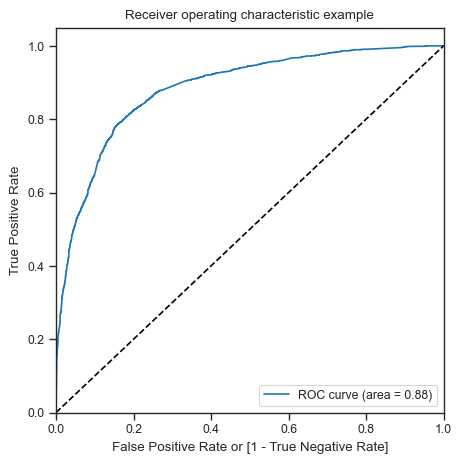

In [141]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )
# Draw ROC
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

* Since the area under the curve is 0.88, our model is good in accuracy

#### Finding Optimal Cutoff Point

In [191]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for num in numbers:
    y_train_pred_final[num]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > num else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.987558,7963,1,1,1,1,1,1,1,1,1,1,1
1,0,0.035512,5521,0,1,0,0,0,0,0,0,0,0,0
2,1,0.875999,1951,1,1,1,1,1,1,1,1,1,1,0
3,1,0.549476,1553,1,1,1,1,1,1,1,0,0,0,0
4,0,0.236508,9170,0,1,1,1,0,0,0,0,0,0,0


In [192]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384652  1.000000  0.000000
0.1   0.1  0.576899  0.973072  0.329253
0.2   0.2  0.740270  0.912689  0.632492
0.3   0.3  0.798964  0.846593  0.769192
0.4   0.4  0.820778  0.778050  0.847488
0.5   0.5  0.814501  0.701346  0.885233
0.6   0.6  0.794099  0.596083  0.917878
0.7   0.7  0.785154  0.525092  0.947717
0.8   0.8  0.755650  0.414525  0.968885
0.9   0.9  0.715631  0.281926  0.986738


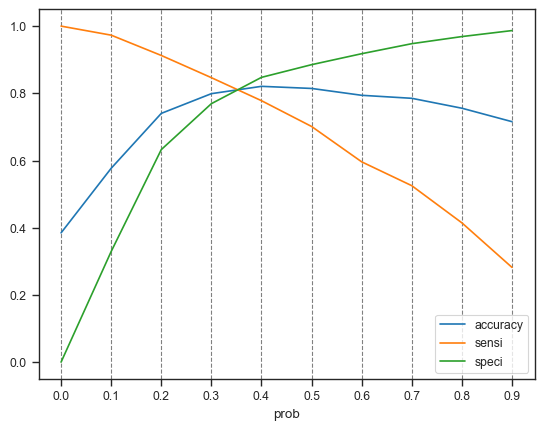

In [193]:
# Plot accuracy sensitivity and specificity for various probabilities.
ax = cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(num)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

* From above Graph, 0.35 is cut-off point to get the balance of model performance

In [194]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,1,0.987558,7963,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.035512,5521,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.875999,1951,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.549476,1553,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.236508,9170,0,1,1,1,0,0,0,0,0,0,0,0


#### Precision and Recall


    Precision (TP / TP + FP) = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
    Recall (TP / TP + FN) = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.



In [195]:
# using sklearn 
from sklearn.metrics import precision_score, recall_score

In [196]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Precision : 0.7925311203319502
Recall : 0.7013463892288861


* We have the same as **Positive Predictive Value** and **Sensitivity** calculated above

##### Precision and recall tradeoff

In [197]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [198]:
thresholds

array([0.00429112, 0.0047471 , 0.00495839, ..., 0.99928868, 0.99954228,
       0.9995692 ])

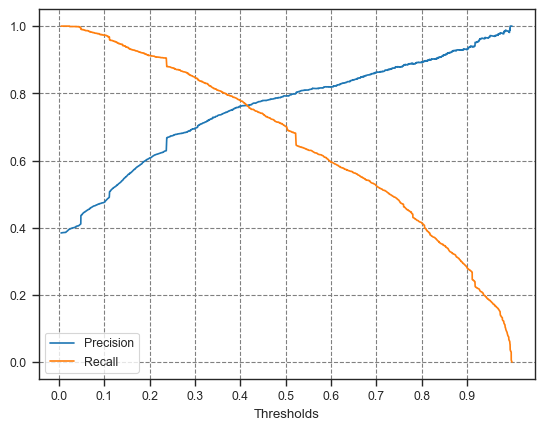

In [199]:
# Plotting a trade-off curve between precision and recall
trade_off_df = pd.DataFrame(columns = ['Thresholds','Precision','Recall'])

trade_off_df['Thresholds'] = thresholds
trade_off_df['Precision'] = p[:-1]
trade_off_df['Recall'] = r[:-1]

ax = trade_off_df.plot.line(x='Thresholds', y=['Precision','Recall'])
plt.xticks(num)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [200]:
# For Precision >= 80%, threshold is around 0.52
trade_off_df[trade_off_df.Thresholds>0.52].Precision.min()

0.7979942693409742

In [201]:
# Check recall
trade_off_df[trade_off_df.Thresholds>0.52].Recall.max()

0.6821705426356589

* **When Precision increases, Recall will decrease**
* **With Precision around 80%, cut-off point should is 0.52, and Recall is around 68%**

#### Assigning Lead Score to the Training data

In [202]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted,Lead_Score
0,1,0.987558,7963,1,1,1,1,1,1,1,1,1,1,1,1,99
1,0,0.035512,5521,0,1,0,0,0,0,0,0,0,0,0,0,4
2,1,0.875999,1951,1,1,1,1,1,1,1,1,1,1,0,1,88
3,1,0.549476,1553,1,1,1,1,1,1,1,0,0,0,0,1,55
4,0,0.236508,9170,0,1,1,1,0,0,0,0,0,0,0,0,24


## 5 - Model Evaluation & Interpretation

### Model Evaluation

In [203]:
# The overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_predicted))

Accuracy : 0.8138731952291274


In [204]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_predicted )
confusion2

array([[3202,  719],
       [ 467, 1984]], dtype=int64)

In [205]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [206]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.8094655242758058
Specificity :  0.8166284111196124
False Positive Rate : 0.18337158888038765
Positive Predictive Value : 0.733999260081391
Negative predictive value : 0.8727173616789315


#### Making predictions on the test set

##### Scaling the test data

In [207]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])


KeyError: "['TotalVisits', 'Page Views Per Visit'] not in index"

In [ ]:
X_test = X_test[cols]
X_test.head()

In [161]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3497    0.915765
4044    0.784373
7200    0.057067
1183    0.110699
8216    0.106608
8746    0.235919
9047    0.031788
6526    0.769170
7694    0.235919
8184    0.865086
dtype: float64

In [208]:
# Converting y_test_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
3497,0.915765
4044,0.784373
7200,0.057067
1183,0.110699
8216,0.106608


In [209]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [210]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [211]:
y_test_df.head()

,Converted,Prospect ID
3497,1,3497
4044,1,4044
7200,0,7200
1183,0,1183
8216,0,8216


In [212]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [213]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [214]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3497,0.915765
1,1,4044,0.784373
2,0,7200,0.057067
3,0,1183,0.110699
4,0,8216,0.106608


In [215]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [216]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [217]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3497,1,0.915765
1,4044,1,0.784373
2,7200,0,0.057067
3,1183,0,0.110699
4,8216,0,0.106608


In [218]:
y_pred_final['Final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [219]:
# Check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_predicted))

Accuracy : 0.809959721713658


In [220]:
# Making the confusion matrix
cfs_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_predicted )
cfs_test

array([[1414,  316],
       [ 203,  798]], dtype=int64)

In [221]:
TP = cfs_test[1,1] # true positive 
TN = cfs_test[0,0] # true negatives
FP = cfs_test[0,1] # false positives
FN = cfs_test[1,0] # false negatives

In [222]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity :  0.7972027972027972
Specificity :  0.8173410404624277
False Positive Rate : 0.18265895953757225
Positive Predictive Value : 0.7163375224416517
Negative predictive value : 0.8744588744588745


**Model Performance on train set:**
    
    Sensitivity :  0.8094655242758058
    Specificity :  0.8166284111196124
    False Positive Rate : 0.18337158888038765
    Positive Predictive Value : 0.733999260081391
    Negative predictive value : 0.8727173616789315
    
**Model Performance on test set:**
    
    Sensitivity :  0.7952047952047953
    Specificity :  0.8184971098265896
    False Positive Rate : 0.1815028901734104
    Positive Predictive Value : 0.7171171171171171
    Negative predictive value : 0.8735348550277606
    

### Observations:

* The Performance of Model is about the same on train and test set => The model is good and stable

### Final model Interpretation

In [223]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            6.307545
Lead Source_Reference                                   3.343620
What is your current occupation_Working Professional    2.538926
Last Notable Activity_Others                            2.523744
Last Activity_SMS Sent                                  1.259898
Total Time Spent on Website                             1.090053
Lead Source_Olark Chat                                  1.018029
const                                                  -0.037606
Last Notable Activity_Modified                         -0.908189
Last Activity_Olark Chat Conversation                  -0.911327
Do Not Email                                           -1.163114
Specialization_Others                                  -1.181291
Lead Origin_Landing Page Submission                    -1.189630
dtype: float64


#### Recommendations:

* The company should make calls to the leads coming from the lead sources **"Welingak Websites"** and **"Reference"** as these are more likely to get converted.
* The company should make calls to the leads who are the **"working professionals"** as they are more likely to get converted.
* The company should make calls to the leads who spent **"more time on the websites"** as these are more likely to get converted.
* The company should make calls to the leads coming from the lead sources **"Olark Chat"** as these are more likely to get converted.
* The company should make calls to the leads whose last activity was **SMS Sent** as they are more likely to get converted.
* The company should **not** make calls to the leads whose last notable activity was **"Modified"** as they are not likely to get converted.
* The company should **not** make calls to the leads whose last activity was **"Olark Chat Conversation"** as they are not likely to get converted.
* The company should **not** make calls to the leads whose lead origin is **"Landing Page Submission"** as they are not likely to get converted.
* The company should **not** make calls to the leads whose Specialization was **"Others"** as they are not likely to get converted.
* The company should **not** make calls to the leads who choose the option of **"Do not Email"** as "yes" as they are not likely to get converted.

